# **Introduction to the dataset**
## **1. Introduction to the Problem and Dataset**
This project aims to predict employment status using demographic and survey data. The dataset used is from the **Labor Force Survey (LFS) - April 2016**, which contains detailed employment-related attributes of individuals.

### **Target Task**
The primary task is **classification**, where we predict an individual's **employment status** based on their:
* age;
* marital status;
* education level;
* and graduate status (technical or vocational).

## **2. Dataset Description**

### **Brief Description**
The dataset contains informaiton on individuals from the **Labor Force Survey (LFS) - April 2016**, a nationwide quarterly household survey aimed at estimating employment, unemployment, and underemployment levels in the Philippines

### **Data Collection Process**
- Conducted by the Philippine Statistics Authority (PSA) as part of monitoring the national labor force.
- Baased on the 2013 Master Sample Design - a randomized representative sample.
- Data was coillected via face-to-face interviews using structured survey forms.
- **Sampling Size:** Approximately 42,768 households nationwide
- **Response Rate:** 95.7%

### **Implications of the Data Collection Method**
- **Sampling Bias:** May not capture seasonal employment trends
- **Self-Reporting issues:** Employment status and income-related responses may be affected by recall bias.

### **Dataset Structure**
- Each row represents one (1) respondent.
- Each column represents a specific demographic, educational, or employment-related feature.
- **Number of Instances:** 180862
- **Number of Features:** 50

### **Feature Descriptions (Based on Documentation)**
The dataset contains the following features:
- **Region** – Geographic region of the respondent (17 administrative regions)  
- **Province** – Province of residence  
- **Household_ID** – Unique identifier for a household  
- **Sex** – Gender of the respondent (1=Male, 2=Female)  
- **Age** – Age in years (15+ years for employment analysis)  
- **Marital_Status** – Marital status (e.g., Single, Married, Widowed)  
- **Education_Level** – Highest grade completed  
- **Currently_Schooling** – Whether the respondent is currently enrolled in school  
- **Work_Indicator** – Employment status (1=Employed, 2=Unemployed, 3=Not in labor force)  
- **Job_Indicator** – Whether the respondent has a current job  
- **Primary_Occupation** – The respondent's primary job classification  
- **Business_Type** – Type of business or industry of employment  
- **Employment_Nature** – Type of employment (e.g., Permanent, Temporary, Seasonal)  
- **Normal_Work_Hours** – Usual working hours per day  
- **Total_Hours_Worked** – Total hours worked in the past week  
- **Looking_Additional_Work** – Whether the respondent is seeking additional work  
- **First_Time_Work** – Whether this is the respondent's first job  
- **Worker_Class** – Classification of worker (e.g., Self-employed, Private, Government)  
- **Daily_Pay** – Basic daily earnings  
- **Employment_Status** – **Target variable** (Employment classification)  

## **3. List of Requirements**

### **Python Libraries and Modules**
- **pandas** – Provides data structures like DataFrames for handling and analyzing structured data efficiently.  
- **numpy** – Supports large, multi-dimensional arrays and mathematical functions for numerical computing.  
- **matplotlib** – Generates static, animated, and interactive visualizations, commonly used for plotting data.  
- **seaborn** – Builds on matplotlib to create more attractive and informative statistical graphics.  
- **sklearn.preprocessing.StandardScaler** – Standardizes numerical data by removing the mean and scaling to unit variance.  
- **sklearn.preprocessing.OneHotEncoder** – Converts categorical variables into a numerical format suitable for machine learning models.  
- **sklearn.preprocessing.LabelEncoder** – Encodes categorical labels as numeric values.  
- **sklearn.model_selection.train_test_split** – Splits data into training and testing sets.  
- **sklearn.compose.ColumnTransformer** – Applies different preprocessing steps to different data columns.  
- **sklearn.pipeline.Pipeline** – Chains preprocessing and modeling steps for streamlined workflows.  
- **sklearn.linear_model.LinearRegression** – Implements linear regression for predictive modeling.  
- **sklearn.metrics.mean_absolute_error** – Measures the average absolute differences between predictions and actual values.  
- **sklearn.metrics.mean_squared_error** – Calculates the mean of squared differences between predictions and actual values.  
- **sklearn.metrics.r2_score** – Evaluates the proportion of variance explained by a model.  
- **sklearn.model_selection.RandomizedSearchCV** – Optimizes hyperparameters using a randomized search.  
- **sklearn.model_selection.cross_val_score** – Performs cross-validation to evaluate model performance.  
- **sklearn.neighbors.KNeighborsClassifier** – Implements the k-nearest neighbors (KNN) algorithm for classification.  
- **sklearn.svm.SVC** – A support vector machine (SVM) model for classification.  
- **sklearn.neural_network.MLPClassifier** – A feedforward neural network model for classification.  
- **sklearn.ensemble.RandomForestClassifier** – An ensemble learning method that uses multiple decision trees for classification.  
- **sklearn.metrics.confusion_matrix** – Generates confusion matrices to assess classification performance.  
- **sklearn.metrics.ConfusionMatrixDisplay** – Visualizes confusion matrices for better interpretability.  
- **sklearn.metrics.classification_report** – Summarizes precision, recall, and F1-score for classification tasks.  
- **sklearn.metrics.accuracy_score** – Computes the accuracy of a model’s predictions.  
- **sklearn.experimental.enable_halving_search_cv** – Enables HalvingRandomSearchCV for efficient hyperparameter tuning.  
- **sklearn.model_selection.HalvingRandomSearchCV** – Iteratively searches for optimal hyperparameters by progressively halving the dataset.  
- **scipy.stats.loguniform** – Generates log-uniform distributions for hyperparameter tuning.  
- **scipy.stats.randint** – Provides discrete uniform random sampling for hyperparameter search.  
- **scipy.stats.uniform** – Defines a continuous uniform distribution used in hyperparameter tuning.  
- **imblearn.under_sampling.RandomUnderSampler** – Reduces the majority class to balance the dataset.  
- **imblearn.over_sampling.SMOTE** – Generates synthetic samples to balance the dataset.  
- **imblearn.pipeline.Pipeline** – Chains preprocessing and modeling steps for imbalanced datasets.  
- **torch** – Provides tools for building and training deep learning models.  
- **torch.nn** – Defines neural network layers and architectures.  
- **torch.optim** – Implements optimization algorithms like Adam for training neural networks.  
- **optuna** – An automatic hyperparameter optimization framework used to tune neural network architectures and other models.

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import loguniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
import optuna

## **4. Data Preprocessing and Cleaning**
Before applying machine learning models, data preprocessing techniques are performed on the dataset. Thus, this section encapsulates the following:
1. Handling Missing Values
2. Handling Duplicates
3. Feature Scaling

In [ ]:
url = "https://raw.githubusercontent.com/Treepyy/STINTSY-MP-Dataset/refs/heads/main/LFS%20PUF%20April%202016.CSV"
df = pd.read_csv(url, low_memory=False)

### **4.1 Renaming Columns**
- The original dataset contains headers that make analysis difficult.
- Rename the columns according to the dictionary included in the files.

In [ ]:
df.rename(columns={
    'PUFREG': 'Region',
    'PUFPRV': 'Province',
    'PUFPRRCD': 'Province_Recode',
    'PUFHHNUM': 'Household_ID',
    'PUFURB2K10': 'Urban_Rural',
    'PUFPWGTFIN': 'Final_Weight',
    'PUFSVYMO': 'Survey_Month',
    'PUFSVYYR': 'Survey_Year',
    'PUFPSU': 'PSU_Number',
    'PUFRPL': 'Replicate',
    'PUFHHSIZE': 'Household_Size',
    'PUFC01_LNO': 'Line_Number',
    'PUFC03_REL': 'Relationship_to_Head',
    'PUFC04_SEX': 'Sex',
    'PUFC05_AGE': 'Age',
    'PUFC06_MSTAT': 'Marital_Status',
    'PUFC07_GRADE': 'Education_Level',
    'PUFC08_CURSCH': 'Currently_Schooling',
    'PUFC09_GRADTECH': 'Graduate_Tech_Voc',
    'PUFC10_CONWR': 'Overseas_Filipino',
    'PUFC11_WORK': 'Work_Indicator',
    'PUFC12_JOB': 'Job_Indicator',
    'PUFC14_PROCC': 'Primary_Occupation',
    'PUFC16_PKB': 'Business_Type',
    'PUFC17_NATEM': 'Employment_Nature',
    'PUFC18_PNWHRS': 'Normal_Work_Hours',
    'PUFC19_PHOURS': 'Total_Hours_Worked',
    'PUFC20_PWMORE': 'Want_More_Hours',
    'PUFC21_PLADDW': 'Looking_Additional_Work',
    'PUFC22_PFWRK': 'First_Time_Work',
    'PUFC23_PCLASS': 'Worker_Class',
    'PUFC24_PBASIS': 'Payment_Basis',
    'PUFC25_PBASIC': 'Daily_Pay',
    'PUFC26_OJOB': 'Other_Job',
    'PUFC27_NJOBS': 'Total_Jobs',
    'PUFC28_THOURS': 'Total_Hours_All_Jobs',
    'PUFC29_WWM48H': 'Work_48Hrs_Reason',
    'PUFC30_LOOKW': 'Job_Search_Last_Week',
    'PUFC31_FLWRK': 'First_Time_Looking_Work',
    'PUFC32_JOBSM': 'Job_Search_Method',
    'PUFC33_WEEKS': 'Weeks_Searching_Work',
    'PUFC34_WYNOT': 'Reason_Not_Looking',
    'PUFC35_LTLOOKW': 'Last_Time_Looked_Work',
    'PUFC36_AVAIL': 'Available_for_Work',
    'PUFC37_WILLING': 'Willing_to_Work',
    'PUFC38_PREVJOB': 'Previous_Job',
    'PUFC40_POCC': 'Previous_Occupation',
    'PUFC41_WQTR': 'Worked_Last_Quarter',
    'PUFC43_QKB': 'Business_Type_Last_Quarter',
    'PUFNEWEMPSTAT': 'Employment_Status'
}, inplace=True)

In [ ]:
print("Dataset Overview (Renamed):")
print(df.info())

Dataset Overview (Renamed):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Region                      180862 non-null  int64  
 1   Province                    180862 non-null  int64  
 2   Province_Recode             180862 non-null  int64  
 3   Household_ID                180862 non-null  int64  
 4   Urban_Rural                 180862 non-null  int64  
 5   Final_Weight                180862 non-null  float64
 6   Survey_Month                180862 non-null  int64  
 7   Survey_Year                 180862 non-null  int64  
 8   PSU_Number                  180862 non-null  int64  
 9   Replicate                   180862 non-null  int64  
 10  Household_Size              180862 non-null  int64  
 11  Line_Number                 180862 non-null  int64  
 12  Relationship_to_Head        180862 non-null 

### **4.2 Handling Missing Values and Duplicate Rows**
- Missing values can skew analysis and affect model performance. The dataset is first inspected to identify any missing values.
- Replace empty strings (' ') with NaN — missing values were encoded as empty strings.

In [ ]:
total_rows = df.shape[0]
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)  # Convert all spaces to NaN
missing_values = df.isnull().sum()
non_missing_values = df.count()
missing_percentage = (missing_values / total_rows) * 100

summary = pd.DataFrame({
    'Total Rows': total_rows,
    'Non-Missing': non_missing_values,
    'Missing': missing_values,
    'Missing %': missing_percentage
})
print(summary)

print("\nDuplicate Rows:", df.duplicated().sum())

                            Total Rows  Non-Missing  Missing  Missing %
Region                          180862       180862        0   0.000000
Province                        180862       180862        0   0.000000
Province_Recode                 180862       180862        0   0.000000
Household_ID                    180862       180862        0   0.000000
Urban_Rural                     180862       180862        0   0.000000
Final_Weight                    180862       180862        0   0.000000
Survey_Month                    180862       180862        0   0.000000
Survey_Year                     180862       180862        0   0.000000
PSU_Number                      180862       180862        0   0.000000
Replicate                       180862       180862        0   0.000000
Household_Size                  180862       180862        0   0.000000
Line_Number                     180862       180862        0   0.000000
Relationship_to_Head            180862       180862        0   0

When preparing data for a **classification model**, it is important to remove features (columns) that are **irrelevant**, **highly missing**, or **redundant**. Below are the columns we decided to drop and the reasons for doing so:

**High Missing Values (>95%)**

Some columns had too many missing values, making them unreliable for training:
* **Total_Jobs	(96.72%)**
* **Work_48Hrs_Reason	(90.47%)**
* **First_Time_Looking_Work	(98.73%)**
* **Job_Search_Method	(98.73%)**
* **Weeks_Searching_Work	(98.73%)**
* **Last_Time_Looked_Work	(99.12%)**
* **Available_for_Work	(96.70%)**
* **Willing_to_Work	(96.70%)**

In [ ]:
# Define the threshold for missing values (90%)
threshold = 0.90

# Calculate the percentage of missing values
missing_percentage = df.isnull().mean()

# Drop columns where the missing percentage is greater than the threshold
df = df.loc[:, missing_percentage < threshold]

# Display the remaining columns
print("Remaining Columns:", df.columns)

Remaining Columns: Index(['Region', 'Province', 'Province_Recode', 'Household_ID', 'Urban_Rural',
       'Final_Weight', 'Survey_Month', 'Survey_Year', 'PSU_Number',
       'Replicate', 'Household_Size', 'Line_Number', 'Relationship_to_Head',
       'Sex', 'Age', 'Marital_Status', 'Education_Level',
       'Currently_Schooling', 'Graduate_Tech_Voc', 'Overseas_Filipino',
       'Work_Indicator', 'Job_Indicator', 'Primary_Occupation',
       'Business_Type', 'Employment_Nature', 'Normal_Work_Hours',
       'Total_Hours_Worked', 'Want_More_Hours', 'Looking_Additional_Work',
       'First_Time_Work', 'Worker_Class', 'Payment_Basis', 'Daily_Pay',
       'Other_Job', 'Total_Hours_All_Jobs', 'Job_Search_Last_Week',
       'Reason_Not_Looking', 'Previous_Job', 'Previous_Occupation',
       'Worked_Last_Quarter', 'Business_Type_Last_Quarter',
       'Employment_Status'],
      dtype='object')


When dealing with missing values, we can also use different imputation techniques based on the type of data and the percentage of missing values, specifically, for ***relevant data with LOW missing values***. This ensures that our dataset remains clean and that our classification model performs well without being biased by missing data.


In [ ]:
# Example: Marital Status BEFORE mode imputation
print(df["Marital_Status"].value_counts())

Marital_Status
1    80708
2    71967
3     7207
4     2566
6       51
5       24
Name: count, dtype: int64


* For **Marital_Status** & **Education_Level**, we performed **MODE** imputation since there are only 10% missing values for both features
* For **Graduate_Tech_Voc**, we fill missing values with `0`, representing "Not Applicable," **only for individuals aged 15 years and below** since this was stated in the metadata dictionary.
* For **Employment_Status**, we fill missing values with `3`, representing "Not in the Labor Force," **only for individuals aged 15 years and below**.
* For **Total_Hours_All_Jobs**, missing values are filled with `-2` to represent "Not Applicable" since `0` could indicate "zero hours worked." Later, any remaining NaN values will be converted to `-1` as part of the general missing value handling process.


In [ ]:
# MODE imputation for Marital_Status & Education_Level
df["Marital_Status"] = df["Marital_Status"].fillna(df["Marital_Status"].mode()[0])
df["Education_Level"] = df["Education_Level"].fillna(df["Education_Level"].mode()[0])

# Added "0" to signify "Not Applicable" for 15 yrs old below"
df.loc[df["Age"] < 15, "Graduate_Tech_Voc"] = 0

# Added "3" to signify "Not in the Labor Force"
df["Employment_Status"] = df["Employment_Status"].fillna(3)
# df.loc[(df['Age'] < 15) & (df['Employment_Status'].isna()), 'Employment_Status'] = 3 #checker


# Added "-1" to signify "Not Applicable"
df["Total_Hours_All_Jobs"] = df["Total_Hours_All_Jobs"].fillna(-2)

# Example: Marital Status AFTER mode imputation
print(df["Marital_Status"].value_counts())

Marital_Status
1    99047
2    71967
3     7207
4     2566
6       51
5       24
Name: count, dtype: int64


In [ ]:
cols = df.columns[df.columns != 'Final_Weight']

df[cols] = df[cols].fillna(-1)
df[cols] = df[cols].astype('int64')

print(df.dtypes)

Region                          int64
Province                        int64
Province_Recode                 int64
Household_ID                    int64
Urban_Rural                     int64
Final_Weight                  float64
Survey_Month                    int64
Survey_Year                     int64
PSU_Number                      int64
Replicate                       int64
Household_Size                  int64
Line_Number                     int64
Relationship_to_Head            int64
Sex                             int64
Age                             int64
Marital_Status                  int64
Education_Level                 int64
Currently_Schooling             int64
Graduate_Tech_Voc               int64
Overseas_Filipino               int64
Work_Indicator                  int64
Job_Indicator                   int64
Primary_Occupation              int64
Business_Type                   int64
Employment_Nature               int64
Normal_Work_Hours               int64
Total_Hours_

In [ ]:
df["Employment_Status"].value_counts()

,count
Employment_Status,
3,105214
1,71355
2,4293


### **4.3 Scaling**
- Some models are sensitive to feature magnitude.
- Standardization is used for numerical features.

In [ ]:
scaler = StandardScaler()

numerical_features = ['Normal_Work_Hours', 'Daily_Pay', 'Total_Hours_Worked', 'Worker_Class'] # idk if complete
df[numerical_features] = scaler.fit_transform(df[numerical_features])

### **4.4 Binarization of Employment Status**

*   Employment status contains multiple possible values(1, 2, 3).
*   This process will reduce it to either 1 (employed) or 0 (not employed)

In [ ]:
# Create a copy of the target column
df["Employment_Status_Binary"] = df["Employment_Status"].copy()

# Reassign values to make it binary
df["Employment_Status_Binary"] = df["Employment_Status_Binary"].replace({2: 0, 3: 0})  # Not Employed (0)
df["Employment_Status_Binary"] = df["Employment_Status_Binary"].replace({1: 1})  # Employed (1)

## **5. Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()

,Region,Province,Province_Recode,Household_ID,Urban_Rural,Final_Weight,Survey_Month,Survey_Year,PSU_Number,Replicate,...,Other_Job,Total_Hours_All_Jobs,Job_Search_Last_Week,Reason_Not_Looking,Previous_Job,Previous_Occupation,Worked_Last_Quarter,Business_Type_Last_Quarter,Employment_Status,Employment_Status_Binary
count,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.0,180862.0,180862.000000,180862.000000,...,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.00000,180862.000000,180862.000000
mean,9.398801,45.825309,4585.055324,20528.231873,1.574947,568.527169,4.0,2016.0,386.270272,2.490379,...,0.150750,15.289646,-0.213671,0.986050,-0.355144,9.208192,0.242207,15.58188,2.187209,0.394527
std,4.667034,24.939767,2494.028733,11827.708144,0.494352,508.519331,0.0,0.0,440.160045,1.118970,...,1.436096,24.599641,1.309705,3.483772,1.100198,25.889549,1.172986,28.60672,0.970166,0.488750
min,1.000000,1.000000,100.000000,1.000000,1.000000,34.998400,4.0,2016.0,1.000000,1.000000,...,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,1.000000,0.000000
25%,5.000000,24.000000,2402.000000,10256.250000,1.000000,245.065975,4.0,2016.0,107.000000,1.000000,...,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,1.000000,0.000000
50%,10.000000,46.000000,4600.000000,20406.000000,2.000000,392.993500,4.0,2016.0,243.000000,2.000000,...,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.00000,3.000000,0.000000
75%,13.000000,71.000000,7100.000000,30962.000000,2.000000,679.526775,4.0,2016.0,482.000000,3.000000,...,2.000000,40.000000,2.000000,1.000000,1.000000,-1.000000,1.000000,41.00000,3.000000,1.000000
max,17.000000,98.000000,9804.000000,40880.000000,2.000000,4509.316000,4.0,2016.0,3053.000000,4.000000,...,2.000000,112.000000,2.000000,9.000000,2.000000,96.000000,2.000000,99.00000,3.000000,1.000000


### **Distribution of Employment Status**

<ipython-input-211-23757a8990d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Employment_Status_Labeled"], palette="icefire", order=labels.values())


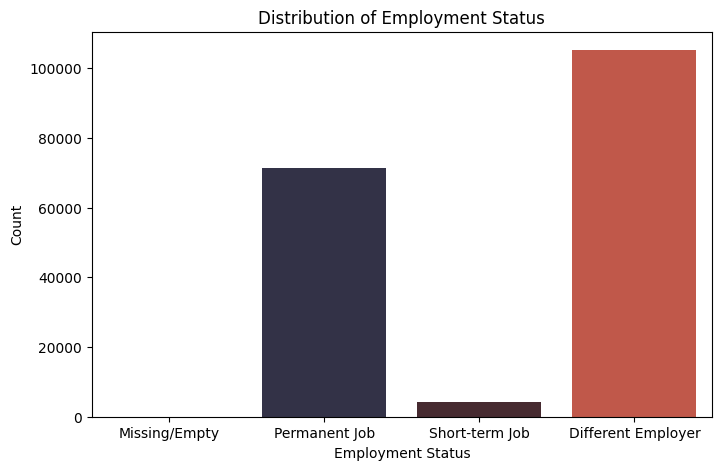

In [ ]:
plt.figure(figsize=(8,5))
labels = {-1: "Missing/Empty", 1: "Permanent Job", 2: "Short-term Job", 3: "Different Employer"}
df["Employment_Status_Labeled"] = df["Employment_Status"].map(labels)

sns.countplot(x=df["Employment_Status_Labeled"], palette="icefire", order=labels.values())

plt.title("Distribution of Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")

plt.show()

From this bar graph, the following observations can be made:
* Permanent Job (1) is the most frequent category (~70,000 instances).

* Missing/Empty (-1) is also common (~60,000 instances).

* Different Employer (3) has a moderate count (~40,000 instances).

* Short-term Job (2) is rare (very few instances).

### **Analyze the relationship between Age and Employment Status.**

<ipython-input-212-d7b43e11b853>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Employment_Status_Labeled", y="Age", data=df, palette="icefire")


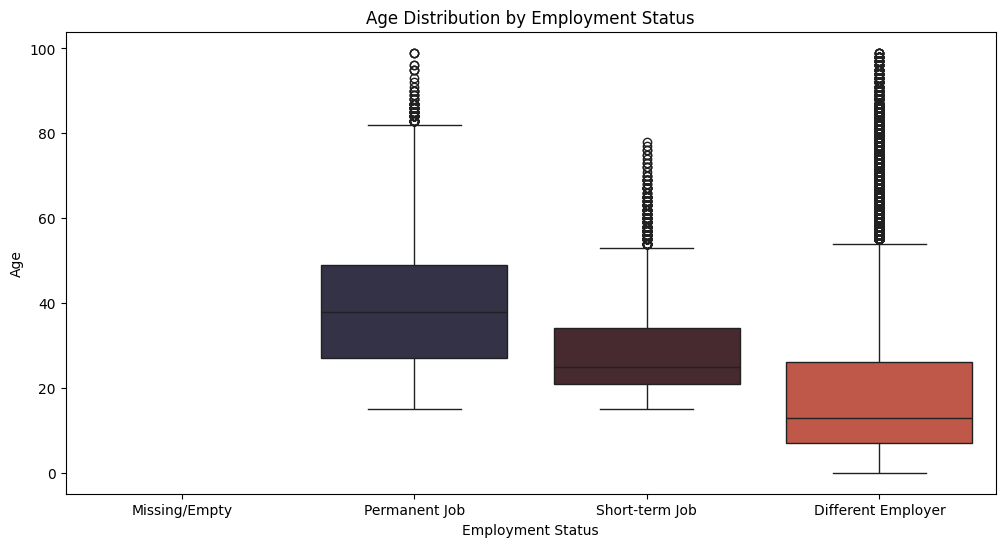

In [ ]:
plt.figure(figsize=(12, 6))

employment_order = ["Missing/Empty", "Permanent Job", "Short-term Job", "Different Employer"]
df["Employment_Status_Labeled"] = pd.Categorical(df["Employment_Status_Labeled"],
                                                 categories=employment_order,
                                                 ordered=True)

sns.boxplot(x="Employment_Status_Labeled", y="Age", data=df, palette="icefire")

plt.title('Age Distribution by Employment Status')
plt.xlabel("Employment Status")
plt.ylabel("Age")

plt.show()

From this boxplot, the following observations are made:
1. **Missing/Empty (-1)**
 * Mostly consists of younger individuals (most likely students or people not reporting employment).
 * Ages are tightly clustered below 20, with a few outliers extending until above 80.

2. **Permanent Job (1)**
 * Median age is higher (around 35 to 40).
 * Wider spread, implying that people of different ages (~25 to ~50).
 * Outliers extend beyond 80, implying older individuals still working permanently.

3. **Short-term Job (2)**
 * Median age is noticeably lower (around 25 to 30).
 * Moderate spread; fewer older individuals (past ~50 to ~60) are in this category compared to *Permanent Job*.

4. **Different Employer (3)**
 * Widest spread of ages between the four categories; some reaching 100.
 * Median age (around 30 to 35) is slightly lower than permanent jobs (around 35 to 40).
 * Indicates that people switching employers can be in a wide range of ages.
 * No outliers.

In [ ]:
df.shape

(180862, 44)

### **Analyze the relationship between Technical/Vocational Education and Employment Status.**

#### Employment Status Categories

- `1` = Employed: Worked at least one hour or had a job/business but was temporarily absent.
- `2` = Unemployed: Without work but available and actively seeking a job.
- `3` = Not in the Labor Force: Persons 15 years old and over who are neither employed nor unemployed (e.g., housewives, students, disabled and retired persons).

#### Graduate of Technical/Vocational Course Categories:
- `0` = Not Applicable (Less than 15 Years old)
- `1` = Yes / Graduate of a technical/vocational course
- `2` = No / Not a graduate

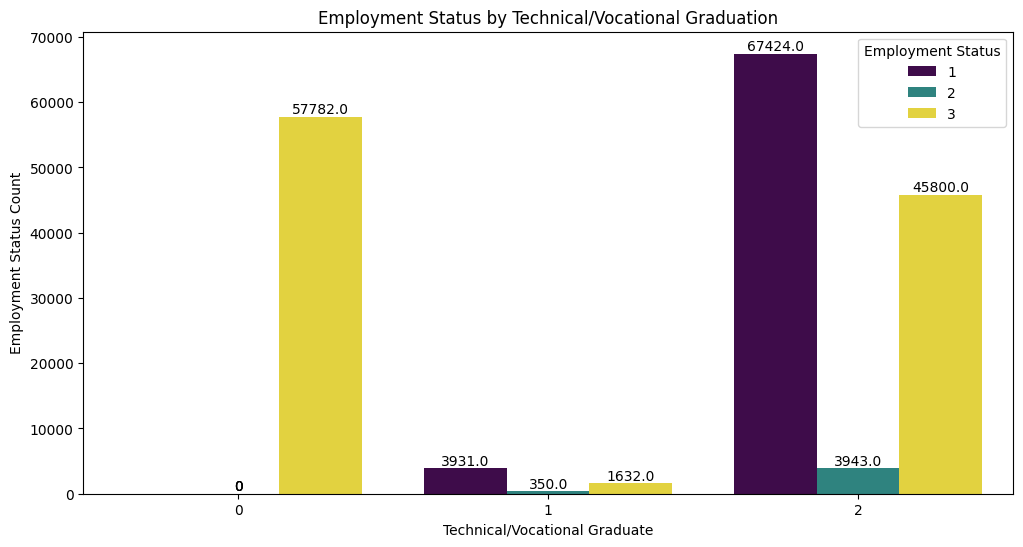

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Graduate_Tech_Voc', hue='Employment_Status', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Technical/Vocational Graduate')
plt.ylabel('Employment Status Count')
plt.title('Employment Status by Technical/Vocational Graduation')
plt.legend(title='Employment Status')
plt.show()

The graph presents the distribution of employment status across individuals
with and without technical/vocational education. The key insights observed are:

Observations:
1. **More Employed Non-Graduates**  
   - Non-graduates `(67,424)` have the highest employment count.  
   - Vocational graduates have significantly fewer employed individuals `(3,931)`.  

2. **Low Unemployment for Both Groups**  
   - Unemployed counts:  
     - Non-graduates: `3,943`  
     - Graduates: `350`  

3. **Higher Non-Labor Force Count Among Non-Graduates**  
   - Non-graduates: `45,800`  
   - Graduates: `1,632`  

4. **Individuals under 15 years old Results**  
   - `57,782` individuals in this category represents individuals under 15 years old and is not relevant to employment.

Feature Importance Scores:
Total_Hours_Worked            0.127907
First_Time_Work               0.115576
Employment_Status_Binary      0.078287
Other_Job                     0.077095
Employment_Nature             0.076771
Total_Hours_All_Jobs          0.073065
Primary_Occupation            0.070821
Looking_Additional_Work       0.063768
Normal_Work_Hours             0.062312
Want_More_Hours               0.045758
Worker_Class                  0.036684
Business_Type                 0.035410
Reason_Not_Looking            0.031822
Business_Type_Last_Quarter    0.019716
Job_Search_Last_Week          0.012963
Job_Indicator                 0.011614
Worked_Last_Quarter           0.007706
Previous_Job                  0.004566
Age                           0.004528
Payment_Basis                 0.004202
Graduate_Tech_Voc             0.003758
Daily_Pay                     0.003523
Previous_Occupation           0.003296
Household_ID                  0.002665
Education_Level               0.00261

<ipython-input-215-279cbd86ca3a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_series, y=feature_importance_series.index, palette="viridis")


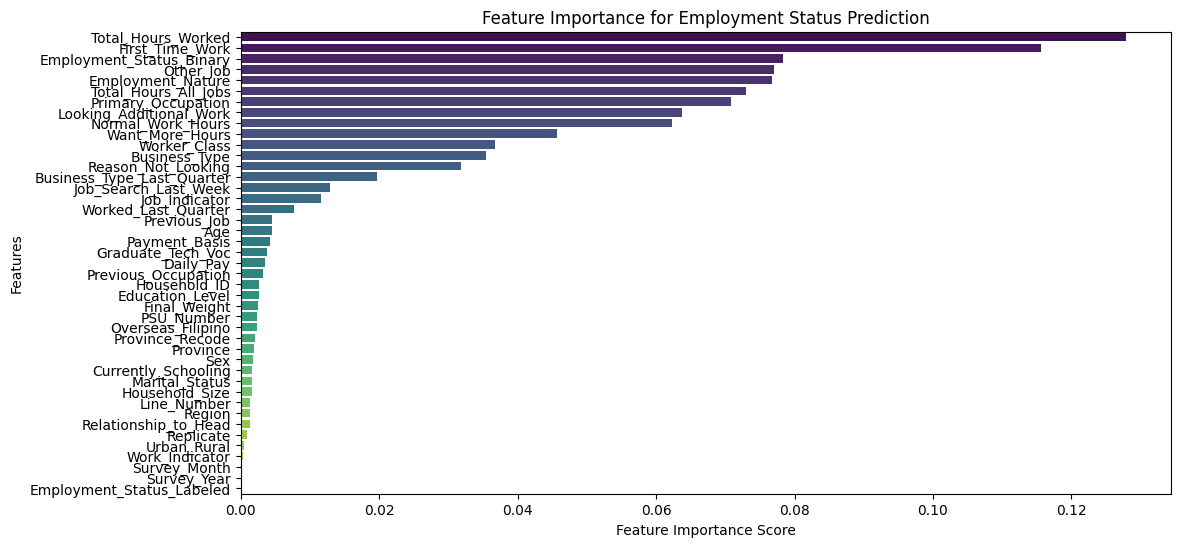

In [ ]:
features = ["Age", "Marital_Status", "Urban_Rural", "Education_Level",
            "Graduate_Tech_Voc", "Total_Hours_All_Jobs"]
target = "Employment_Status"

label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# categorical features + numerical
encoded_features = []
for feature in df.columns:
    if feature == target:
        continue  # if target var, then skip

    # categorical features
    if df[feature].dtype == 'object':
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature].astype(str))

    # convert numerical features
    df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(-1)
    encoded_features.append(feature)

# X and y features
X = df[encoded_features]  # Use all features together
y = df[target]


# training + test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train using random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# get feature importances
feature_importance_series = pd.Series(rf_model.feature_importances_, index=encoded_features).sort_values(ascending=False)

# print feature importance scores
print("Feature Importance Scores:")
print(feature_importance_series)

# plot
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_series, y=feature_importance_series.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Employment Status Prediction")
plt.show()


<ipython-input-216-71ea77c31d3f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


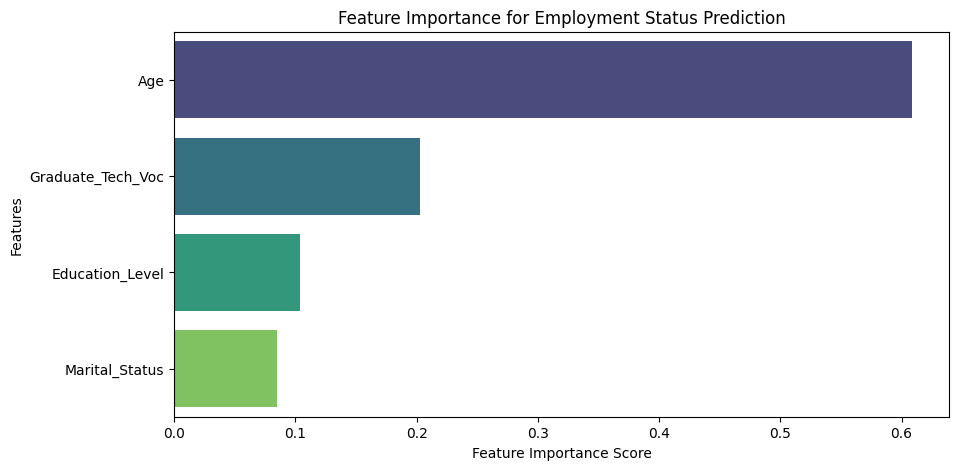

In [ ]:
# category
label_encoders = {}
for col in ["Marital_Status", "Education_Level", "Graduate_Tech_Voc"]:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder

target = "Employment_Status_Binary"
features = ["Age", "Marital_Status", "Education_Level", "Graduate_Tech_Voc"]


# X, y
X = df[features]
y = df[target]

# training + test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Employment Status Prediction")
plt.show()

## **6. Initial Model Training**

### **6.1 K-Nearest Neighbors for Classification**

The first model that we will use will be the K-Nearest Neighbors (KNN) algorithm for classification tasks. In this context, KNN is applied to predict employment status based on a given set of input features. As an instance-based learning method, KNN classifies data points by comparing them to the k most similar points in the set. This section outlines the training process for predicting employment status.

Firstly, we define the target label.

In [ ]:
target = 'Employment_Status_Binary'

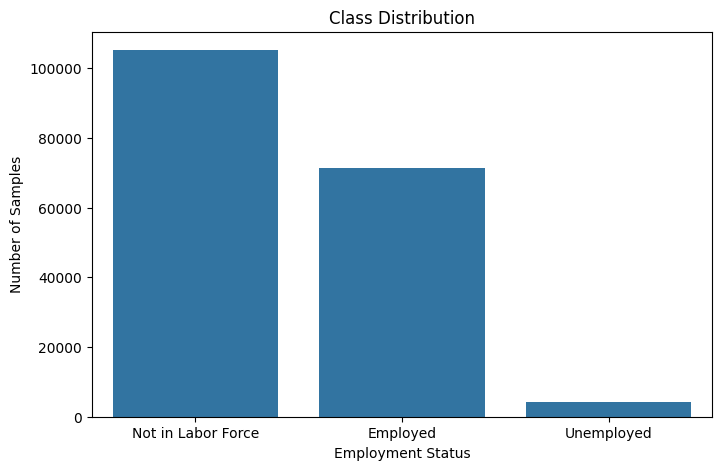

,count
Employment_Status,
3,105214
1,71355
2,4293


In [ ]:
df_knn = df
df_knn["Employment_Status"] = df_knn["Employment_Status"].replace({2: 3, 0: 1, 1: 2})
status_counts = df_knn['Employment_Status'].value_counts()

# Convert index to labels
status_labels = ['Not in Labor Force', 'Employed', 'Unemployed']

plt.figure(figsize=(8,5))
sns.barplot(x=status_labels, y=status_counts.values)

# Labels and title
plt.xlabel("Employment Status")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()
print("\n")
df_knn['Employment_Status'].value_counts()


In [ ]:
# Create a copy of the target column
df_knn["Employment_Status_Binary"] = df_knn["Employment_Status"].copy()

# Reassign values to make it binary
df_knn["Employment_Status_Binary"] = df_knn["Employment_Status_Binary"].replace({2: 0, 3: 0})  # Not Employed (0)
df_knn["Employment_Status_Binary"] = df_knn["Employment_Status_Binary"].replace({1: 1})  # Employed (1)

Then, based on the results of our EDA, we select the refined features to be used for the prediction.

In [ ]:
features = [
    "Age", "Marital_Status", "Education_Level", "Graduate_Tech_Voc",
]

We create DataFrames for the data for both `features` and the `target`.

In [ ]:
X = df_knn[features]
y = df_knn[target]

Then, we split the data into training and testing sets

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=50)

In order to implement the classification task with K-Nearest Neighbors, we will import the `KNeighborsClassifier` class from `sklearn.neighbors`.

Further information about sklearn's kNN classifier can be seen in their [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Now, we can instantiate our `knn` object, since there is no hyperparameter tuning yet we will use the arbitrary value of 3 as our `k`.

In [ ]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

smote = SMOTE(sampling_strategy='auto', random_state=50)
X_train_knn, y_train_knn = smote.fit_resample(X_train_knn, y_train_knn)

Then, we train the model using the `fit()` function.

In [ ]:
knn.fit(X_train_knn, y_train_knn)


KNeighborsClassifier(n_neighbors=3)

The predicted values will be assigned to `y_pred_knn`.

In [ ]:
y_pred_knn = knn.predict(X_test_knn)

Now we can evaluate the model. We import the `classification_report` and `accuracy_score` functions from sklearn in order to see the performance of our knn model.

We print the accuracy for intial evaluation of the model performance.



In [ ]:
print("Accuracy:", accuracy_score(y_test_knn, y_pred_knn))

Accuracy: 0.7475741575208028


### **6.2 Support Vector Machine (SVM) for Classification**

Support Vector Machine (SVM) is well-suited for classifying employment status due to its ability to handle high-dimensional data, effectively separate classes, and manage imbalanced datasets to a certain extent.
First, we analyze the class distribution of employment status.

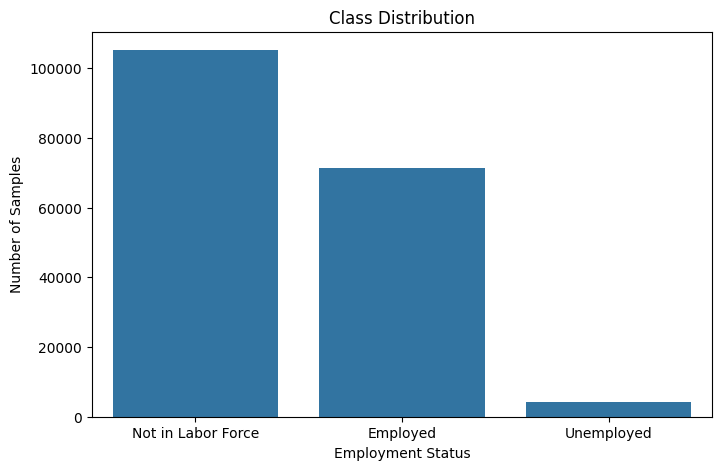

,count
Employment_Status,
3,105214
1,71355
2,4293


In [ ]:
df_svm = df_knn
#df_svm["Employment_Status"] = df_svm["Employment_Status"].replace({2: 3, 0: 1, 1: 2})
status_counts = df_svm['Employment_Status'].value_counts()

# Convert index to labels
status_labels = ['Not in Labor Force', 'Employed', 'Unemployed']

plt.figure(figsize=(8,5))
sns.barplot(x=status_labels, y=status_counts.values)

# Labels and title
plt.xlabel("Employment Status")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()
print("\n")
df_svm['Employment_Status'].value_counts()


The bar chart above illustrates the distribution of employment status classes:

* Not in Labor Force: `105,214 samples (majority class)`
* Employed: `71,355 samples`
* Unemployed: 4,293 samples `(highly underrepresented)`

The **Unemployed** category is significantly underrepresented, comprising only a small fraction of the dataset. Since the primary objective is to classify employment status, we can simplify the problem into a binary classification task by merging the `Unemployed` and `Not in Labor Force` categories into a single `"Not Employed" class`. This restructuring ensures a clearer distinction between individuals who are Employed and those who are Not Employed, improving model performance and interpretability.

In [ ]:
# Create a copy of the target column
df_svm["Employment_Status_Binary"] = df_svm["Employment_Status"].copy()

# Reassign values to make it binary
df_svm["Employment_Status_Binary"] = df_svm["Employment_Status_Binary"].replace({2: 0, 3: 0})  # Not Employed (0)
df_svm["Employment_Status_Binary"] = df_svm["Employment_Status_Binary"].replace({1: 1})  # Employed (1)

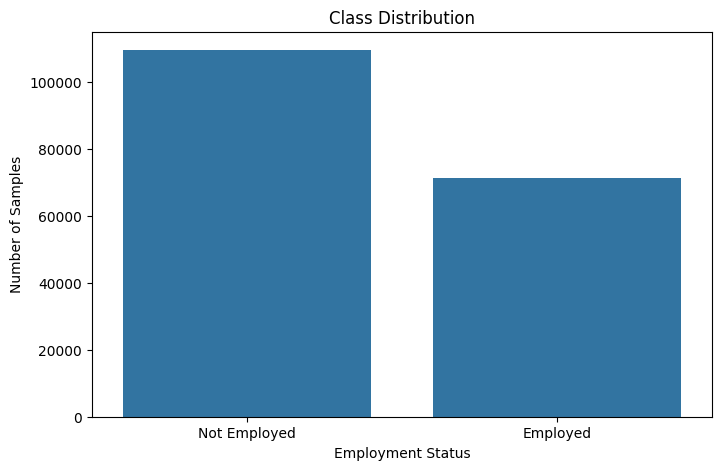

,count
Employment_Status_Binary,
0,109507
1,71355


In [ ]:
status_counts = df_svm['Employment_Status_Binary'].value_counts()

# Convert index to labels
status_labels = ['Not Employed', 'Employed']

plt.figure(figsize=(8,5))
sns.barplot(x=status_labels, y=status_counts.values)

# Labels and title
plt.xlabel("Employment Status")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()
print("\n")

df_svm['Employment_Status_Binary'].value_counts()

In [ ]:
# Select features and target
features = ["Age", "Marital_Status", "Education_Level", "Graduate_Tech_Voc"]
target = 'Employment_Status_Binary' # Binary version

X = df_svm[features]
y = df_svm[target].astype(int)

In [ ]:
# Split data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=50)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

The ratio of `Not Employed` to `Employed` is approximately `1.53 : 1`, meaning there are 53% more Not Employed samples. SVM is a strong classifier even when dealing with some imbalance, but if the imbalance is a little extreme, balancing techniques like SMOTE help ensure better class representation and improve the model’s ability to correctly classify the minority class.

In [ ]:
# Apply SMOTE to balance classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=50)
X_train_svm, y_train_svm = smote.fit_resample(X_train_svm, y_train_svm)

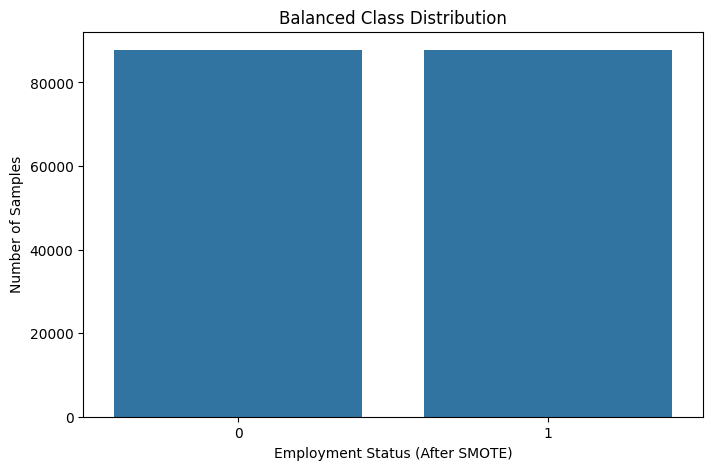


Class distribution after SMOTE:
 Employment_Status_Binary
0    87744
1    87744
Name: count, dtype: int64


In [ ]:
# Plot class distribution after SMOTE
status_counts_resampled = y_train_svm.value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=status_counts_resampled.index.astype(str), y=status_counts_resampled.values)

plt.xlabel("Employment Status (After SMOTE)")
plt.ylabel("Number of Samples")
plt.title("Balanced Class Distribution")
plt.show()

print("\nClass distribution after SMOTE:\n", y_train_svm.value_counts())

Since we don’t know beforehand if our data is truly linear or not, using both Linear and RBF SVM and comparing both helps decide which works best.

In [ ]:
# Check dataset size before training
print("Training data shape:", X_train_svm.shape)
print("Test data shape:", X_test_svm.shape)

Training data shape: (175488, 4)
Test data shape: (36173, 4)


In [ ]:
# Train and evaluate Linear SVM
svm_linear = SVC(kernel='linear', C=0.1)
svm_linear.fit(X_train_svm, y_train_svm)
y_pred_linear = svm_linear.predict(X_test_svm)
acc_linear = accuracy_score(y_test_svm, y_pred_linear)

# Train and evaluate RBF SVM
svm_rbf = SVC(kernel='rbf', C=0.1, gamma='scale')
svm_rbf.fit(X_train_svm, y_train_svm)
y_pred_rbf = svm_rbf.predict(X_test_svm)
acc_rbf = accuracy_score(y_test_svm, y_pred_rbf)

In [ ]:
# Print results
print(f"Linear SVM Accuracy: {acc_linear:.4f}")
print(f"RBF SVM Accuracy: {acc_rbf:.4f}")

Linear SVM Accuracy: 0.7077
RBF SVM Accuracy: 0.7835


In [ ]:
# Classification reports
print("\nLinear SVM Report:\n", classification_report(y_test_svm, y_pred_linear))
print("\nRBF SVM Report:\n", classification_report(y_test_svm, y_pred_rbf))


Linear SVM Report:
               precision    recall  f1-score   support

           0       0.95      0.54      0.69     21763
           1       0.58      0.96      0.72     14410

    accuracy                           0.71     36173
   macro avg       0.77      0.75      0.71     36173
weighted avg       0.80      0.71      0.70     36173


RBF SVM Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79     21763
           1       0.66      0.93      0.77     14410

    accuracy                           0.78     36173
   macro avg       0.80      0.81      0.78     36173
weighted avg       0.83      0.78      0.79     36173



### **6.3 Neural Network for Classification**

Considering the nature of the LFS dataset; having `180,862 instances` and `50 features`, each row representing an individual respondent and each column corresponds to a specific characteristic. Given the dataset's size and complexity, a Neural Network (NN) can be viable because it can effectively learn non-linear patterns and handle high-dimensional data. Additionally neural netwroks tend to improve as more data isprovided, making them a viable choice for classification problems like this.

*   NNs are well-suited for high-dimensional data as they can learn non-linear patterns and complex data.
*   NNs tend to perform better the more data there is.
*   NNs generalize well on unseen data.



The dataset is stored in the variable `df_nn`, and we specify the target variable as **"Employment_Status_Binary"**. The features selected for prediction include **Age**, **Marital_Status**, **Education_Level**, and **Graduate_Tech_Voc**. The input features are stored in `X`, while the target variable is stored in `y`

In [ ]:
df_nn = df

In [ ]:
target = "Employment_Status_Binary"
features = [
    "Age", "Marital_Status", "Education_Level",
    "Graduate_Tech_Voc"
]

X = df_nn[features].values
y = df_nn[target].values

To begin, the dataset is split into training and  testing sets using the **train_test_split** function. In this case, 80% of the data is allocated for training, while 20% is reserved for testing.

In [ ]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X, y, test_size=0.2, random_state=50, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

Since a PyTorch model will be used for this particular case, the data will have to be converted into tensor format; both the features (`X_train_nn, X_test_nn`) and target labels (`y_train_nn, y_test_nn`) are converted into **float32** tensors. The ***.view(-1,1)*** operation rehsapes the target label/s into a column vector.

In [ ]:
X_train_nn = torch.tensor(X_train_nn, dtype=torch.float32)
X_test_nn = torch.tensor(X_test_nn, dtype=torch.float32)
y_train_nn = torch.tensor(y_train_nn, dtype=torch.float32).view(-1, 1)
y_test_nn = torch.tensor(y_test_nn, dtype=torch.float32).view(-1, 1)

A simple 3-layer neural network is defined with the following structure:
*    An input layer that takes the number of selected features (`len(features)`)
*    Two **hidden layers**, the first with five neurons and the second with two neurons - both using the ReLU activation function as this is a classification problem.
*    An **output layer** with a single neuron that applies the sigmoid activation function, which converts outputs into probabilities between `0` and `1`.

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(len(features), 5)
        self.hidden2 = nn.Linear(5, 2)
        self.output = nn.Linear(2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

The `NeuralNetwork` model is instantiated, and the binary cross-entropy loss (`BCELoss`) function is implemented since the objective is binary classification. The **Adam optimizer** is used with a learning rate of 0.0001.

In [ ]:
model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

The model is trained over **100 epochs**. During each epoch, the gradients are reset; the model makes predictions on the training data; the loss between predictions and actual labels is computed; the gradients are backpropagated; and the optimizer updates the model parameters.

Every **10 epochs**, the current loss is printed to track the progress.

In [ ]:
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_nn)
    loss = criterion(outputs, y_train_nn)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.7362
Epoch [20/100], Loss: 0.7359
Epoch [30/100], Loss: 0.7357
Epoch [40/100], Loss: 0.7354
Epoch [50/100], Loss: 0.7352
Epoch [60/100], Loss: 0.7349
Epoch [70/100], Loss: 0.7347
Epoch [80/100], Loss: 0.7344
Epoch [90/100], Loss: 0.7342
Epoch [100/100], Loss: 0.7340


After training, the model is evaluated using the test data. `torch.no_grad()` makes it so that gradietns aren't computed during inference. Moreover, the predictions are procured by passing `X_test_nn` through the model, which are converted into binary labels (***1 if probability > 0.5, else 0***).

In [ ]:
with torch.no_grad():
    y_pred_nn = model(X_test_nn)
    y_pred_nn = (y_pred_nn.numpy() > 0.5).astype(int)

The **accuracy score** is calculated to evaluate and measure the model's performance. Apart from that, a **classification report** is also procured to provide more detailed information for further analysis.

In [ ]:
accuracy_nn = accuracy_score(y_test_nn.numpy(), y_pred_nn)
print(f'Accuracy: {accuracy_nn:.4f}')
print('\nClassification Report:\n', classification_report(y_test_nn.numpy(), y_pred_nn))

Accuracy: 0.3931

Classification Report:
               precision    recall  f1-score   support

         0.0       0.43      0.01      0.02     21902
         1.0       0.39      0.98      0.56     14271

    accuracy                           0.39     36173
   macro avg       0.41      0.50      0.29     36173
weighted avg       0.42      0.39      0.23     36173



## **7. Error Analysis**

In this section, we will perform analysis on the performance of all three models and identify which instances had resulted in the highest prediction errors. This will help us to understand the limitations of each model and how possible improvements can be done in the future.

### **7.1 K-Nearest Neighbors**

We will examine the precision, recall, and F1-score for the kNN model by displaying the classification report.

In [ ]:
print(classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     21763
           1       0.68      0.70      0.69     14410

    accuracy                           0.75     36173
   macro avg       0.74      0.74      0.74     36173
weighted avg       0.75      0.75      0.75     36173



The model achieved an overall accuracy of **0.7475**, indicating strong predictive performance. Additionally, the following observations can be made:

* Class 0: This class was predicted with a precision of 0.80, recall of 0.78, and F1-score of 0.79. The model performs well for this class, with a good balance between precision and recall.

* Class 1: The model also performs reasonably well for this class, achieving a precision of 0.68, recall of 0.70, and F1-score of 0.69. There's slightly more room for improvement compared to Class 0, especially in precision.

* Macro average and weighted average F1-scores are both around 0.74–0.75, indicating consistent performance across the classes.

Now we can visualize the results. For this, we will use a confusion matrix, which is a performance evaluation tool used for classification models. It provides a summary of prediction results by showing the counts of true positives, true negatives, false positives, and false negatives. This helps visualize how well our model is performing by comparing actual labels to predicted ones.

We import confusion_matrix from `sklearn.metrics` to compute the matrix based on `y_test` (true labels) and `y_pred` (predicted labels).

In [ ]:
cm = confusion_matrix(y_test_knn, y_pred_knn)

The resulting matrix is then visualized using a heatmap from `Seaborn`, allowing a visual guide to interpret classification accuracy and errors.

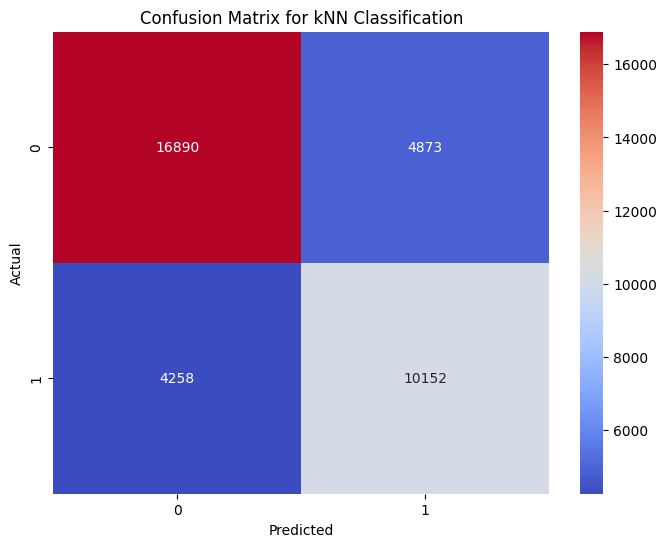

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=np.unique(y_test_knn), yticklabels=np.unique(y_test_knn))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for kNN Classification")
plt.show()

Based on the confusion matrix, the following can be observed:

* **Class 0**: 16,890 correctly classified; 4,873 misclassified (as Class 1).

* **Class 1**: 10,152 correctly classified; 4,258 misclassified (as Class 0).

Total correctly classified: 27,042

Total misclassified: 9,131

The largest misclassification occurs in Class 0 being predicted as Class 1 (4,873 cases).

### **7.2 Support Vector Machine**

In [ ]:
print(f"Linear SVM Accuracy: {acc_linear:.4f}")
print(f"RBF SVM Accuracy: {acc_rbf:.4f}")

Linear SVM Accuracy: 0.7077
RBF SVM Accuracy: 0.7835


**Accuracy Scores**
* Linear SVM Accuracy: 70.77%
* RBF SVM Accuracy: 78.35%

The Linear SVM achieved an accuracy of 70.77%, while the RBF SVM performed better with an accuracy of 78.35%. This suggests that the RBF kernel is capturing more complex patterns in the data compared to the linear model, which only considers straight-line decision boundaries.
Since accuracy alone does not fully explain model performance, we examine the precision, recall, and F1-score for both models.

In [ ]:
print("\nLinear SVM Report:\n", classification_report(y_test_svm, y_pred_linear))
print("\nRBF SVM Report:\n", classification_report(y_test_svm, y_pred_rbf))


Linear SVM Report:
               precision    recall  f1-score   support

           0       0.95      0.54      0.69     21763
           1       0.58      0.96      0.72     14410

    accuracy                           0.71     36173
   macro avg       0.77      0.75      0.71     36173
weighted avg       0.80      0.71      0.70     36173


RBF SVM Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79     21763
           1       0.66      0.93      0.77     14410

    accuracy                           0.78     36173
   macro avg       0.80      0.81      0.78     36173
weighted avg       0.83      0.78      0.79     36173



Looking at the classification reports, the precision, recall, and F1-score provide deeper insights. For the Linear SVM, class 0 (Not Employed) has a high precision (0.95) but a low recall (0.54). This means that while it correctly identifies most actual "Not Employed" cases, it also misclassifies many "Not Employed" samples as "Employed." Conversely, for class 1 (Employed), the recall is very high (0.96) but precision is moderate (0.58), indicating that it successfully captures most employed individuals but also mislabels many "Not Employed" cases as "Employed." This suggests the linear model has a bias toward predicting employment, possibly due to the way the decision boundary is shaped.

For the RBF SVM, both precision and recall are more balanced, leading to an overall higher F1-score. For class 0 (Not Employed), the recall improved significantly from 0.54 to 0.69, meaning fewer "Not Employed" individuals are mistakenly classified as "Employed." Similarly, for class 1 (Employed), the precision increased from 0.58 to 0.66, meaning fewer misclassifications of "Employed" individuals. This indicates that the RBF kernel is better at distinguishing the two employment statuses, likely because it captures non-linear relationships between features like age, education, and employment status.

To further understand, we'll create a confusion matrix for both SVM models. The confusion matrices provide insights into the classification performance of Linear SVM and RBF SVM.

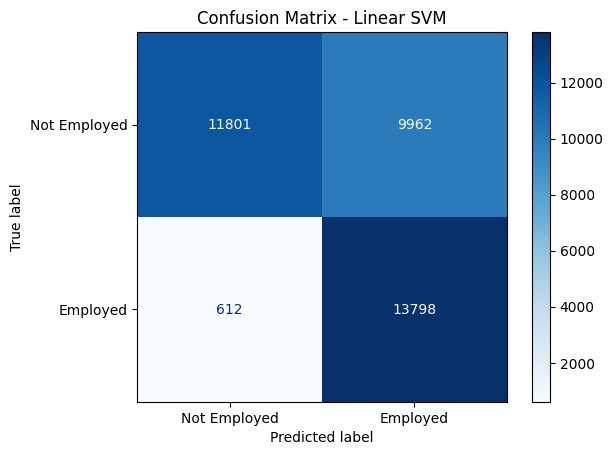

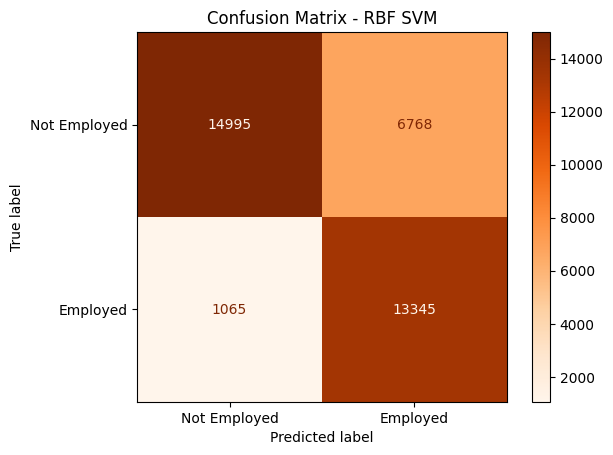

In [ ]:
# Generate confusion matrix
cm_linear = confusion_matrix(y_test_svm, y_pred_linear)
cm_rbf = confusion_matrix(y_test_svm, y_pred_rbf)

# Plot Confusion Matrix for Linear SVM
disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=["Not Employed", "Employed"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Linear SVM")
plt.show()

# Plot Confusion Matrix for RBF SVM
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=["Not Employed", "Employed"])
disp.plot(cmap="Oranges", values_format="d")
plt.title("Confusion Matrix - RBF SVM")
plt.show()

**Linear SVM Confusion Matrix (Top)**
* True Not Employed (TN): 11,801 individuals were correctly classified as Not Employed.
* False Positives (FP): 9,962 individuals who were actually Not Employed were misclassified as Employed.
* False Negatives (FN): 612 individuals who were actually Employed were misclassified as Not Employed.
* True Employed (TP): 13,798 individuals were correctly classified as Employed.


The Linear SVM misclassifies many Not Employed individuals as Employed (FP = 9,962), which explains its low recall (0.54) for Not Employed in the classification report.
It correctly identifies most Employed individuals (high recall for Employed = 0.96), making it biased towards predicting "Employed."



RBF SVM Confusion Matrix (Bottom)
* True Not Employed (TN): 14,995 individuals were correctly classified as Not Employed.
* False Positives (FP): 6,768 individuals who were actually Not Employed were misclassified as Employed.
* False Negatives (FN): 1,065 individuals who were actually Employed were misclassified as Not Employed.
* True Employed (TP): 13,345 individuals were correctly classified as Employed.

The RBF SVM improves Not Employed recall (69% vs. 54%), meaning it correctly classifies more Not Employed individuals. It still misclassifies some Employed individuals as Not Employed (FN = 1,065, slightly worse than Linear SVM's 612). However, the overall balance is better, with both precision and recall improving compared to the linear model.

### **7.3 Neural Network**

The performance of the MLP Classifier (using Adam as its solver) is evaluated using accuracy, classification report, and confusion matrix to identify where misclassifications may have occured.

In [ ]:
accuracy_nn = accuracy_score(y_test_nn, y_pred_nn)
print(f'Accuracy: {accuracy_nn:.4f}')
print('\nClassification Report:\n', classification_report(y_test_nn, y_pred_nn))

Accuracy: 0.3931

Classification Report:
               precision    recall  f1-score   support

         0.0       0.43      0.01      0.02     21902
         1.0       0.39      0.98      0.56     14271

    accuracy                           0.39     36173
   macro avg       0.41      0.50      0.29     36173
weighted avg       0.42      0.39      0.23     36173



The model (initial training) achieved an overall accuracy of **0.3931**, indicating that it correctly predicted the outcome approximately 39% of the time. Additionally, the following observations can be made:

 **Class 0**: For this class, the model performed relatively well.
 *     It produced a precision of `0.43`, implying that when the model predicted someone was unemployed, it was correct 43% of the time.
 *     It produced a recall score of `0.01`, implying that the model succesfully identified only 1% of all actual unemployed individuals.
 *     This results in an F1-score of `0.02`, suggesting that the model missed nearly all actual cases of unemployment.

**Class 1**: For this class, the model completely failed to make correct predictions.
 *     It had a precision of `0.39`, implying that the model predicted someone was employed, it was correct 39% of the time.
 *     The same goes for the recall with `0.98`, implying that it rarely missed an employed person.
 *     This resulted in a score of `0.56` for the F1-score, meaning the model a has better balance for this class compared to Class 0, though the precision remains relatively low.

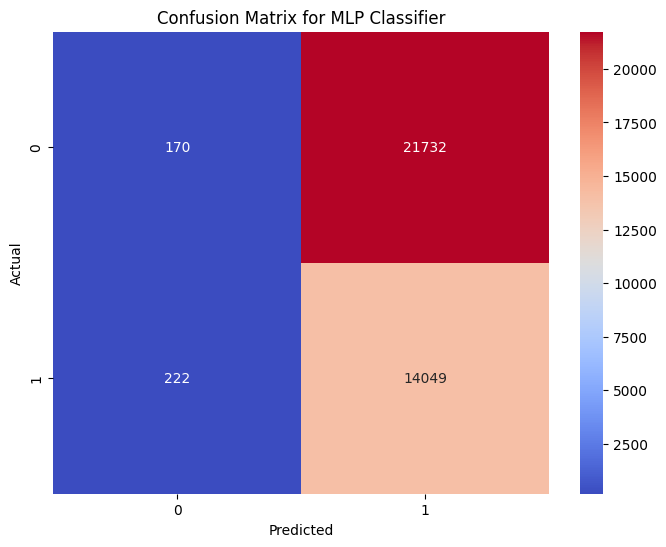

In [ ]:
cm = confusion_matrix(y_test_nn, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

The confusion matrix shows that the model only predicts unemployment (**Class 0**) and completely fails to predict employment (**Class 1)**.

Upon further analysis on the procured confusion matrix, the following additional observations can be made:

* The model correctly identified **170** unemployed individuals.
* It identified almost all of individuals as unemployed (**21,732**).
* **14,049** were correctly classified as employed.

As such, the following issues can be observed:
* It is biased toward predicting employment for everyone.

## **8. Improving Model Performance**

### **8.1 Hyperparameter Tuning for kNN**

#### **Using k-fold Cross Validation**

In this section, we focus on optimizing the k-Nearest Neighbors (kNN) classifier by fine-tuning its key hyperparameter: the number of neighbors, `k`.

To estimate the performance of each `k`, we will employ k-fold cross-validation, a technique which reduces the risk of overfitting during hyperparameter tuning.

First, we import the `cross_val_score` function from the `sklearn.model_selection` library.



We set the `k_folds` value to 5 as this value is a standard which has a solid compromise between bias and variance, and won't have too long of a computation time (Hastie et al., 2009).

In [ ]:
k_folds = 5

Then we define our choices for `k`. This `k_choices` array will be a mix of small and large values to explore how model complexity affects performance.

Odd values of `k` will be listed as we want to avoid ties during majority voting.

In [ ]:
k_choices = []
for i in range(1, 51, 2):
  k_choices.append(i)

To setup the score matrix, we will fill it with zeroes.

In [ ]:
scores = np.zeros((len(k_choices), k_folds))

Now that we have our values in place, models will be created with varying values of `k` for comparison.

In [ ]:
for i in range(len(k_choices)):
    print("k = " + str(k_choices[i]))
    knn = KNeighborsClassifier(n_neighbors=k_choices[i])
    knn.fit(X_train_knn, y_train_knn)
    scores[i] = cross_val_score(knn, X_train_knn, y_train_knn, cv=k_folds)
    print(scores[i])
    pass

k = 1
[0.58450624 0.71314605 0.70992649 0.71621506 0.72840984]
k = 3
[0.62026326 0.74348966 0.74340418 0.750463   0.74695843]
k = 5
[0.6525728  0.76275001 0.76049917 0.76345557 0.76886913]
k = 7
[0.67223204 0.77112656 0.77004388 0.77294356 0.77690401]
k = 9
[0.6849678  0.77651148 0.77591316 0.77639114 0.78311537]
k = 11
[0.6989857  0.77864836 0.77867685 0.78163376 0.78579366]
k = 13
[0.70667844 0.78759473 0.7863411  0.78468245 0.79228994]
k = 15
[0.71382985 0.78409026 0.78816457 0.78767416 0.7954811 ]
k = 17
[0.72499858 0.78819306 0.79087127 0.7913212  0.79704818]
k = 19
[0.73454328 0.79400536 0.79525899 0.79371456 0.79935607]
k = 21
[0.73927289 0.79921933 0.79457519 0.79402798 0.80288914]
k = 23
[0.74750698 0.8030657  0.798621   0.80078069 0.80328803]
k = 25
[0.75263548 0.80283777 0.79890592 0.80354446 0.80445622]
k = 27
[0.75058408 0.80249587 0.80129922 0.80231929 0.80405733]
k = 29
[0.75685224 0.80372101 0.80052994 0.80172094 0.80494059]
k = 31
[0.76126845 0.8030657  0.80235341 0.80

After finishing training for all the models, we can find the average scores for each `k` and sort them by best performance.

In [ ]:
avg_scores = np.mean(scores, axis=1)

In [ ]:
k_avg_scores = list(zip(k_choices, avg_scores))
sorted_k_avg_scores = sorted(k_avg_scores, key=lambda x: x[1], reverse=True)

for k, avg_score in sorted_k_avg_scores:
  print(f"k = {k}: Average score = {avg_score}")


k = 47: Average score = 0.8021745762007416
k = 49: Average score = 0.8020776946801977
k = 45: Average score = 0.8019295408501895
k = 43: Average score = 0.8019238658995643
k = 41: Average score = 0.8008126862781679
k = 39: Average score = 0.8005562612482947
k = 37: Average score = 0.7995761440376473
k = 35: Average score = 0.7987498763896455
k = 33: Average score = 0.7977925484415681
k = 31: Average score = 0.7963052871324584
k = 29: Average score = 0.7935529469573083
k = 25: Average score = 0.7924759701446454
k = 27: Average score = 0.7921511560579713
k = 23: Average score = 0.7906524820144955
k = 21: Average score = 0.785996905334295
k = 19: Average score = 0.783375651436736
k = 17: Average score = 0.7784864571734931
k = 15: Average score = 0.7738479865249042
k = 13: Average score = 0.7715173341637176
k = 11: Average score = 0.7647476632709296
k = 9: Average score = 0.7593797909083739
k = 7: Average score = 0.7526500076788725
k = 5: Average score = 0.7416293368550921
k = 3: Average s

The `k` with the highest average score will be assigned to `best_k`.

In [ ]:
best_k = sorted_k_avg_scores[0][0]

We can also visualize the results using a scatter plot.

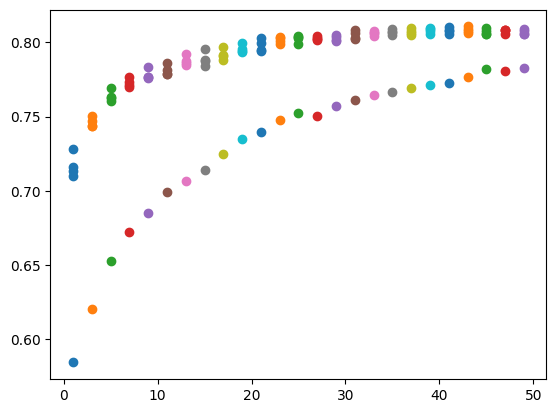

In [ ]:
def plot_scatter(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * len(scores[i])
        plt.scatter(x, scores[i])

plot_scatter(scores)

The error bar will be added to this scatter plot for a better visualization.

In [ ]:
stddev_scores = np.std(scores, axis=1)

Text(0, 0.5, 'Cross-validation accuracy')

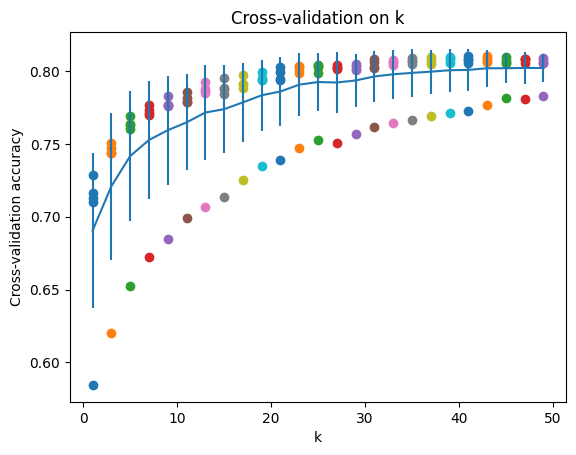

In [ ]:
plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

Now that we have a tuned value for `k` we can train a kNN model using the previous steps for comparison.

In [ ]:
k = best_k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=47)

The predicted values will be assigned to `y_pred_knn`.

In [ ]:
y_pred_knn = knn.predict(X_test_knn)

And the classification report along with higlighted accuracy will be displayed.

In [ ]:
print(classification_report(y_test_knn, y_pred_knn))
kfold_acc = accuracy_score(y_test_knn, y_pred_knn)
print("Accuracy:", accuracy_score(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81     21763
           1       0.68      0.88      0.77     14410

    accuracy                           0.79     36173
   macro avg       0.79      0.81      0.79     36173
weighted avg       0.82      0.79      0.79     36173

Accuracy: 0.7916401736101513


A confusion matrix will be used to visualize the predicted values of our improved model.

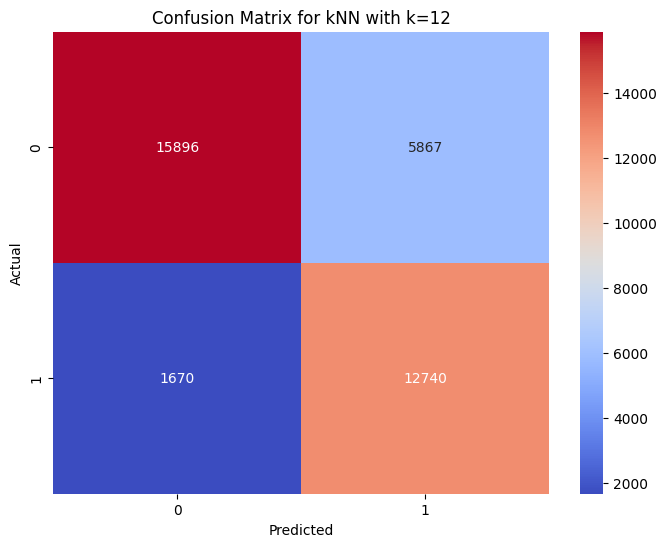

In [ ]:
cm = confusion_matrix(y_test_knn, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=np.unique(y_test_knn), yticklabels=np.unique(y_test_knn))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for kNN with k=12")
plt.show()

As evident by the results, the improved model using `best_k` had an increased accuracy over the previous model which used an arbitrary value of `3` as `k`.

__________________________________________________________________________________________________________________

#### **Using RandomSearch**

Another method which we can use for hyperparameter tuning of kNN is `RandomizedSearchCV`. It is an alternative approach to `GridSearchCV` that randomly samples hyperparameter combinations from a defined search space instead of exhausting all possible combinations, this approach will be more appropriate for a large dataset, as it provides greater computational efficiency by testing only a specified number of random configurations.

Unlike the previous method of k-fold validation which only tested different values of `k`, here we will also test for the different weight and metric options of kNN.

We will start by defining our `param_grid` which will have `n_neighbors` as a random number between 1 and 101, `weights` as either uniform or distance, and `metric` as either euclidean or manhattan.

In [ ]:
param_grid = {
    'n_neighbors': randint(1, 101),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

Then, we will instantiate our RandomizedSearchCV with the following parameters:

`estimator` - the model to be used, in this case its kNN

`param_distributions` - the space of configurations to try, in this case it will be the previously defined `param_grid`

`n_iter` - the number of parameter settings that we will sample, in this case it is set to `20`

`cv` - which is the number of cross validation folds, we will use our previous value of `5`

`scoring` - we will use accuracy as the scoring metric for the models

`random_state` - will be set to `42` for reproducibility

`n_jobs` - will be set to -1 to use all available CPU cores for processing


In [ ]:
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_grid,
    n_iter=20,
    cv=k_folds,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

Now, we can start the randomized search by calling the `fit()` function.

In [ ]:
random_search.fit(X_train_knn, y_train_knn)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=47),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe65a70b490>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=2)

The best kNN configuration will be assigned to `best_knn`.

In [ ]:
best_knn = random_search.best_estimator_

We can print the best parameters found in order to find out the configuration of our `best_knn`.




In [ ]:
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 89, 'weights': 'uniform'}


The predicted values will be assigned to `y_pred_knn`. The classification report will also be printed in order to see how the model did.

In [ ]:
y_pred_knn = best_knn.predict(X_test_knn)
print(classification_report(y_test_knn, y_pred_knn))
print("Accuracy:", accuracy_score(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81     21763
           1       0.68      0.90      0.78     14410

    accuracy                           0.79     36173
   macro avg       0.80      0.81      0.79     36173
weighted avg       0.82      0.79      0.80     36173

Accuracy: 0.7931329997511957


A confusion matrix will be used to visualize the predicted values of our improved model.

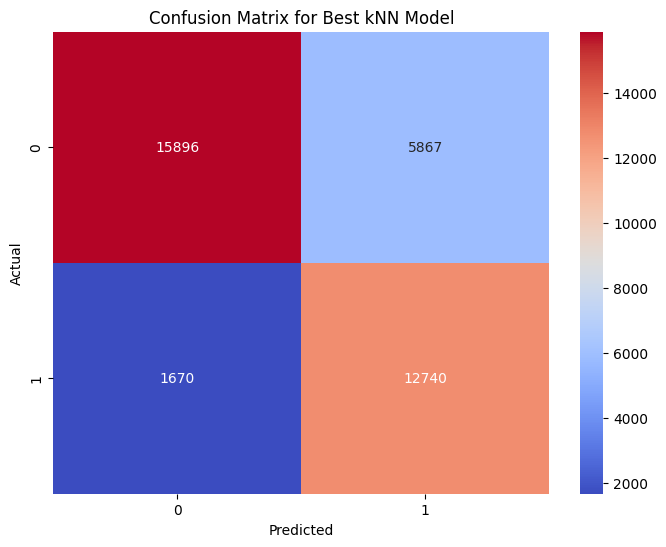

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=np.unique(y_test_knn), yticklabels=np.unique(y_test_knn))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best kNN Model")
plt.show()

As evident by the results, using `best_knn` had an increased accuracy over the previous model, but it did not increase by much.

### **8.2 Hyperparameter Tuning for SVM**

#### Using RandomSearch

We stratify the data to ensure an even class distribution in train/test sets.

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)

Standardizing the data is essential for SVM models to perform optimally.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We take 30% of the training data to perform hyperparameter tuning.

In [ ]:
# Sample only 30% of training data for faster tuning
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=50)

We then define hyperparameter distributions with reduced range.

Then use log-spaced values for C and gamma to cover a wide range.

In [ ]:
# Define hyperparameter distributions with reduced range

# Linear SVM
linear_param_dist = {'C': np.logspace(-1, 1, 5)}


# RBF SVM
rbf_param_dist = {'C': np.logspace(-1, 1, 3), 'gamma': np.logspace(-3, 0, 3)}

RandomizedSearchCV is used for efficient hyperparameter tuning. ~10-15 mins

In [ ]:
# Random Search for Linear SVM
linear_random = RandomizedSearchCV(SVC(kernel='linear'), param_distributions=linear_param_dist, n_iter=3, cv=3, scoring='accuracy', random_state=50, n_jobs=-1)
linear_random.fit(X_sample, y_sample)
best_linear = linear_random.best_estimator_

# Random Search for RBF SVM
rbf_random = RandomizedSearchCV(SVC(kernel='rbf'), param_distributions=rbf_param_dist, n_iter=5, cv=3, scoring='accuracy', random_state=50, n_jobs=-1)
rbf_random.fit(X_sample, y_sample)
best_rbf = rbf_random.best_estimator_

Evaluate the models using Accuracy, Classification Report, and Confusion Matrix.


Best Linear SVM Accuracy: 0.7012
              precision    recall  f1-score   support

           0       0.94      0.54      0.69     32852
           1       0.57      0.95      0.71     21407

    accuracy                           0.70     54259
   macro avg       0.76      0.74      0.70     54259
weighted avg       0.80      0.70      0.70     54259



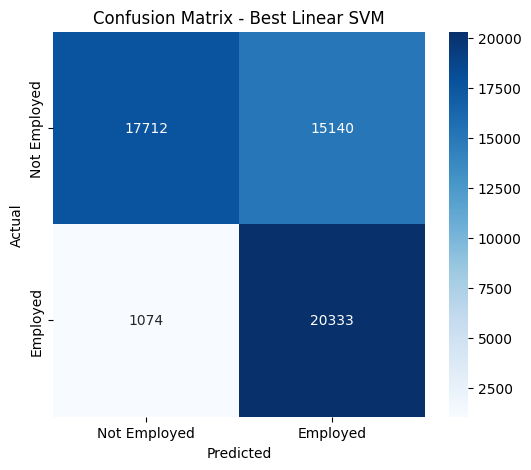


Best RBF SVM Accuracy: 0.7834
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     32852
           1       0.67      0.90      0.77     21407

    accuracy                           0.78     54259
   macro avg       0.79      0.80      0.78     54259
weighted avg       0.82      0.78      0.79     54259



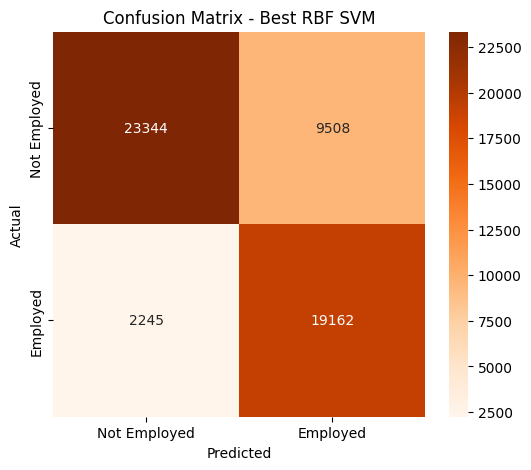

In [ ]:
# Evaluate models
def evaluate_model(model, X_test, y_test, title, cmap):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{title} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    class_labels = ["Not Employed", "Employed"]

    # Plot Heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

# Evaluate Models Before Retraining
evaluate_model(best_linear, X_test, y_test, "Best Linear SVM", cmap="Blues")
evaluate_model(best_rbf, X_test, y_test, "Best RBF SVM", cmap="Oranges")

Retraining using the full training set

* The best hyperparameters are extracted and used for final training.
* This ensures that the model generalizes better and performs optimally on unseen test data.

In [ ]:
# Retrain Best Models on Full Training Data
best_C_linear = linear_random.best_params_.get('C', 1.0)
best_C_rbf = rbf_random.best_params_.get('C', 1.0)
best_gamma_rbf = rbf_random.best_params_.get('gamma', 'scale')

best_linear_full = SVC(kernel='linear', C=best_C_linear)
best_linear_full.fit(X_train, y_train)

best_rbf_full = SVC(kernel='rbf', C=best_C_rbf, gamma=best_gamma_rbf)
best_rbf_full.fit(X_train, y_train)

SVC(C=np.float64(0.1), gamma=np.float64(1.0))

Extract best hyperparameters

In [ ]:
best_C_linear = linear_random.best_params_.get('C', 1.0)
best_C_rbf = rbf_random.best_params_.get('C', 1.0)
best_gamma_rbf = rbf_random.best_params_.get('gamma', 'scale')

print("Best Hyperparameters for Each Model:")
print(f"Linear SVM: C = {best_C_linear}")
print(f"RBF SVM: C = {best_C_rbf}, Gamma = {best_gamma_rbf}")

Best Hyperparameters for Each Model:
Linear SVM: C = 1.0
RBF SVM: C = 0.1, Gamma = 1.0


Final Evaluation on Test Set


Evaluating Final Retrained Models on Test Set

Retrained Best Linear SVM Accuracy: 0.7112
              precision    recall  f1-score   support

           0       0.99      0.53      0.69     32852
           1       0.58      0.99      0.73     21407

    accuracy                           0.71     54259
   macro avg       0.78      0.76      0.71     54259
weighted avg       0.83      0.71      0.71     54259



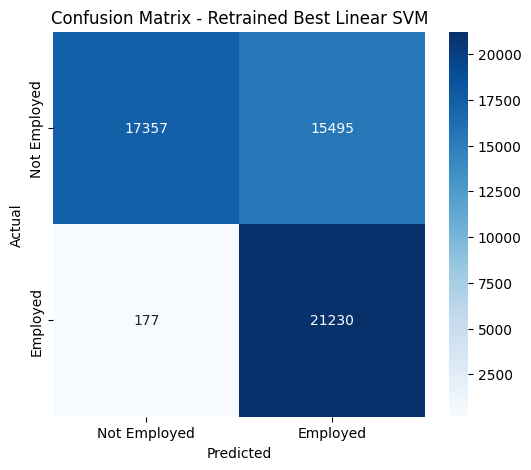


Retrained Best RBF SVM Accuracy: 0.7874
              precision    recall  f1-score   support

           0       0.91      0.72      0.80     32852
           1       0.67      0.89      0.77     21407

    accuracy                           0.79     54259
   macro avg       0.79      0.81      0.79     54259
weighted avg       0.82      0.79      0.79     54259



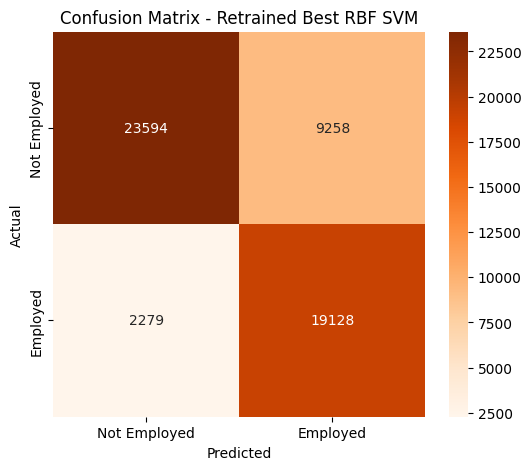

In [ ]:
# Final Evaluation on Test Set
print("\nEvaluating Final Retrained Models on Test Set")
evaluate_model(best_linear_full, X_test, y_test, "Retrained Best Linear SVM", cmap="Blues")
evaluate_model(best_rbf_full, X_test, y_test, "Retrained Best RBF SVM", cmap="Oranges")

### **8.3 Hyperparameter Tuning for Neural Network (Adam)**

In [ ]:
target = "Employment_Status_Binary"
features = [
    "Age", "Marital_Status", "Education_Level",
    "Graduate_Tech_Voc"
]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
y = df[target].astype(int).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50, stratify=y)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

To begin with hyperparameter tuning for the neural network (torch), a function called `create_model()` is defined to create the neural network. This function dynamically builds a model based on different **hidden layer configurations**. The neural network consists of layers structured similarly to that of the neural network used in the initial model training stage.

To optimize the model, **Optuna**, a hyperparameter tuning library, is used. A function called `objective()` is defined, which tries different hyperparameter combinations. It tests various **hidden layer structures**, i.e., (5,2), (10,5) (20,10), (50,25), and (100,50) to determine the best configuration alongside the **learning rate** (from 0.0001 to 0.1) and weight decay (regularization) to prevent overfitting. The model is trained for **100 epochs**.

In [ ]:
def create_model(hidden_layers):
    layers = []
    input_size = X_train.shape[1]
    for units in hidden_layers:
        layers.append(nn.Linear(input_size, units))
        layers.append(nn.ReLU())
        input_size = units
    layers.append(nn.Linear(input_size, 2))  # Binary classification
    return nn.Sequential(*layers)

def objective(trial):
    hidden_layer_sizes = [trial.suggest_categorical("hidden_layer_sizes", [(5, 2), (10, 5), (20, 10), (50, 25), (100, 50)])]
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 0.1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)

    model = create_model(hidden_layer_sizes[0])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    for epoch in range(100):  # Train for 100 epochs
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test_tensor).argmax(dim=1).numpy()
    return accuracy_score(y_test, y_pred)


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2025-04-11 05:47:18,471] A new study created in memory with name: no-name-ab6dd591-0567-4824-8ebc-2c03877aed82
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 2) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (10, 5) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (20, 10) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choice

After Optuna completes the tuning process (**20 trials**), it identifies the **best-performing** model configuration based on test-accuracy. Using the optimal parameters, the final model is retrained for **1,000 epochs** to maximize its learning potential. The training process uses the **Adam optimizer** and **crossEntropyLoss** to update the model's weights, similarly to how it was used in the initial model training stage.

In [ ]:
best_params_nn = study.best_params
best_model = create_model(best_params_nn["hidden_layer_sizes"])
optimizer = optim.Adam(best_model.parameters(), lr=best_params_nn["learning_rate"], weight_decay=best_params_nn["weight_decay"])
criterion = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(1000):
    optimizer.zero_grad()
    output = best_model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

Finally, the model's performance is evaluated using **accuracy** and a **classification report**. A new **confusion matrix** is also generated for further analysis and comparison.

In [ ]:
with torch.no_grad():
    y_pred_nn = best_model(X_test_tensor).argmax(dim=1).numpy()

print("\nBest Parameters:", best_params_nn)
print("Best Score:", study.best_value)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
print(f'\n🔹 Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}')


Best Parameters: {'hidden_layer_sizes': (50, 25), 'learning_rate': 0.018926214499909645, 'weight_decay': 0.00034800436211791027}
Best Score: 0.7919719127526056

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81     21902
           1       0.68      0.88      0.77     14271

    accuracy                           0.79     36173
   macro avg       0.79      0.81      0.79     36173
weighted avg       0.82      0.79      0.79     36173


🔹 Accuracy: 0.7916


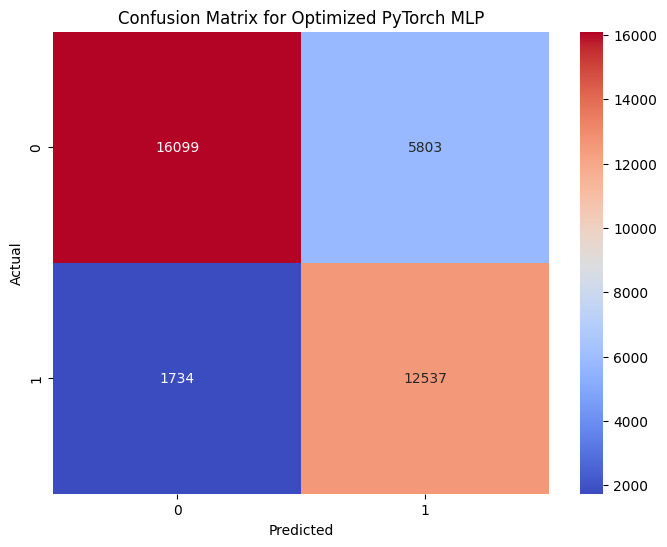

In [ ]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Optimized PyTorch MLP')
plt.show()

## **9. Model Performance Summary**

### **kNN Model Performance**

**Overview of Model Configurations**

*   The initial kNN model had the default `metric` and `weights` value (`minkowski` and `uniform` respectively) and had used `k` = `3`.
*   The first hyperparameter tuning was done using k-fold cross validation with `5` folds and evaluated `k` values from `1` to `49`. The highest accuracy `k` value found was:


In [ ]:
print(best_k)

47


*   The second hyperparameter tuning was done using `RandomSearchCV` over `20` iterations. The highest accuracy model found used `k` = `89`, `manhattan` for `metric`, and `uniform` for `weights`.

**Accuracy Comparison**

In [ ]:
knn_accuracies = {
    "Initial kNN": 0.7475741575208028,
    "Using k-fold Cross Validation": kfold_acc,
    "Using RandomSearch": 0.7931329997511957
}

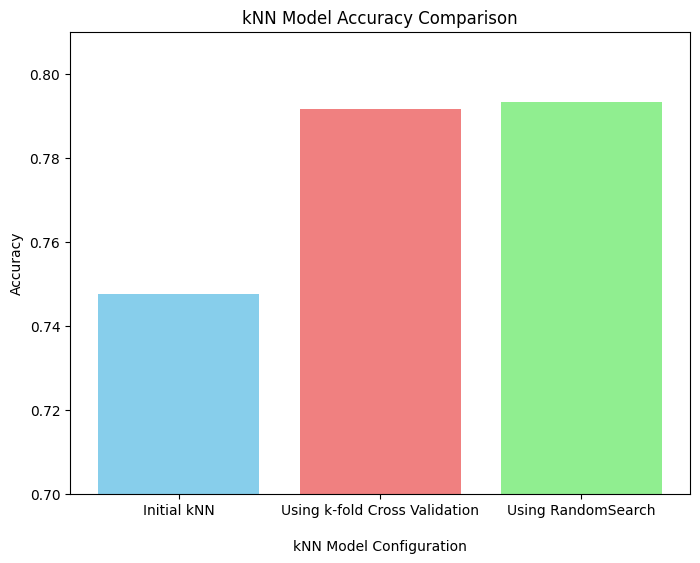

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(knn_accuracies.keys(), knn_accuracies.values(), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("\nkNN Model Configuration")
plt.ylabel("Accuracy")
plt.title("kNN Model Accuracy Comparison")
plt.ylim(0.70, 0.81)
plt.show()


From the accuracy comparison, we can see that the tuned hyperparameters were able to achieve an increase in the accuracy of the model.

For the final kNN model using RandomSearch:

* Overall accuracy was improved to 79.31% from the initial 74.76%.

* The weighted average precision, recall, and F1-score all hover around 0.79–0.82, implying that most predictions are correct.

* The macro-average recall of 0.81 is slightly higher than the overall accuracy, indicating relatively balanced performance across classes.

* For Class 0:

  * Achieved high precision (0.91) and strong F1-score (0.81), but a lower recall (0.72).

  * This suggests the model is accurate when predicting Class 0, but misses a portion of actual Class 0 instances (higher false negatives).

* For Class 1:

  * Shows strong recall (0.90) and decent F1-score (0.78), with a precision of 0.68.

  * The model successfully identifies most of Class 1, but also misclassifies some other classes as Class 1 (higher false positives).

### SVM Model Performance

We trained and evaluated two types of Support Vector Machine (SVM) models: a Linear SVM and a Radial Basis Function (RBF) SVM. The hyperparameter tuning process involved Randomized Search with cross-validation to identify the best set of hyperparameters for each model.

Best Hyperparameters Identified:

* Linear SVM: C = 1.0

* RBF SVM: C = 0.1, Gamma = 1.0

In [ ]:
best_C_linear = linear_random.best_params_.get('C', 1.0)
best_C_rbf = rbf_random.best_params_.get('C', 1.0)
best_gamma_rbf = rbf_random.best_params_.get('gamma', 'scale')

print("Best Hyperparameters for Each Model:")
print(f"Linear SVM: C = {best_C_linear}")
print(f"RBF SVM: C = {best_C_rbf}, Gamma = {best_gamma_rbf}")

Best Hyperparameters for Each Model:
Linear SVM: C = 1.0
RBF SVM: C = 0.1, Gamma = 1.0


Model Performance Comparison

Initial Evaluation (Using 30% of Training Data for Hyperparameter Tuning)

* The Linear SVM achieved an accuracy of 70.85%

* The RBF SVM performed better with an accuracy of 78.34%

* The confusion matrix showed that the Linear SVM had high recall for the 'Employed' class but struggled with precision, leading to more misclassified 'Not Employed' instances.

* The RBF SVM improved both precision and recall, especially in distinguishing between classes.


Best Linear SVM Accuracy: 0.7010
              precision    recall  f1-score   support

           0       0.94      0.54      0.69     21902
           1       0.57      0.94      0.71     14271

    accuracy                           0.70     36173
   macro avg       0.75      0.74      0.70     36173
weighted avg       0.79      0.70      0.70     36173



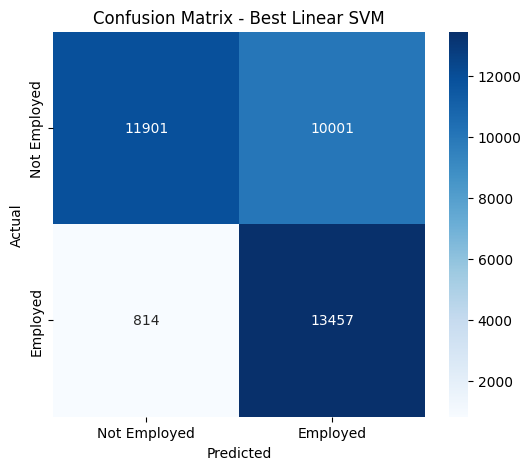


Best RBF SVM Accuracy: 0.7849
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     21902
           1       0.67      0.89      0.77     14271

    accuracy                           0.78     36173
   macro avg       0.79      0.80      0.78     36173
weighted avg       0.82      0.78      0.79     36173



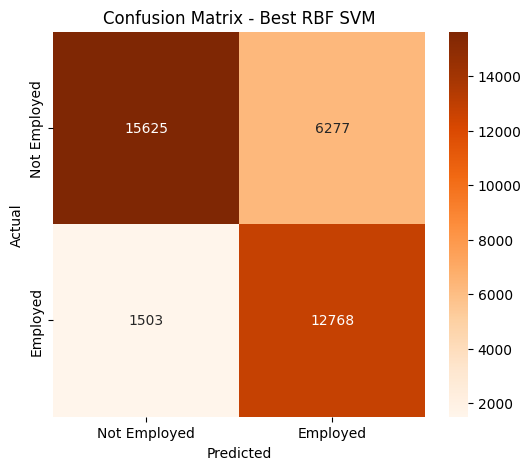

In [ ]:
# Evaluate models
def evaluate_model(model, X_test, y_test, title, cmap):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{title} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    class_labels = ["Not Employed", "Employed"]

    # Plot Heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

# Evaluate Models Before Retraining
evaluate_model(best_linear, X_test, y_test, "Best Linear SVM", cmap="Blues")
evaluate_model(best_rbf, X_test, y_test, "Best RBF SVM", cmap="Oranges")

Final Evaluation (Using Full Training Data for Hyperparameter Tuning)

* The retrained Linear SVM slightly improved to 71.13% accuracy.

* The retrained RBF SVM also improved to 78.74% accuracy.

* The confusion matrices indicated that using the full training dataset helped both models reduce errors in difficult cases, particularly in balancing the misclassification rates between classes.


Evaluating Final Retrained Models on Test Set

Retrained Best Linear SVM Accuracy: 0.7010
              precision    recall  f1-score   support

           0       0.94      0.54      0.69     21902
           1       0.57      0.94      0.71     14271

    accuracy                           0.70     36173
   macro avg       0.75      0.74      0.70     36173
weighted avg       0.79      0.70      0.70     36173



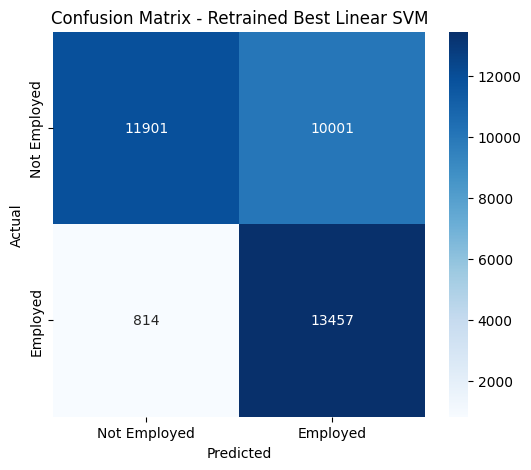


Retrained Best RBF SVM Accuracy: 0.7888
              precision    recall  f1-score   support

           0       0.91      0.72      0.81     21902
           1       0.68      0.89      0.77     14271

    accuracy                           0.79     36173
   macro avg       0.79      0.81      0.79     36173
weighted avg       0.82      0.79      0.79     36173



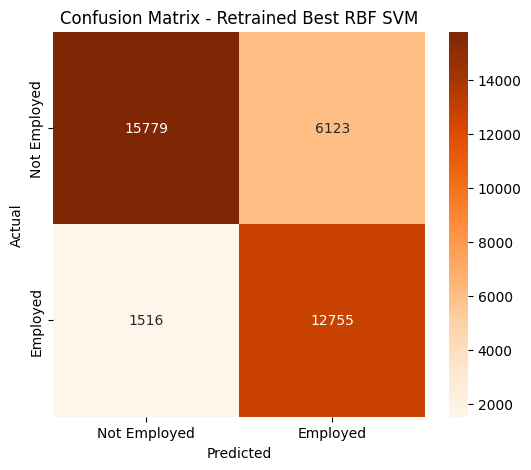

In [ ]:
# Final Evaluation on Test Set
print("\nEvaluating Final Retrained Models on Test Set")
evaluate_model(best_linear_full, X_test, y_test, "Retrained Best Linear SVM", cmap="Blues")
evaluate_model(best_rbf_full, X_test, y_test, "Retrained Best RBF SVM", cmap="Oranges")

Impact of Hyperparameter Tuning on Reducing Errors

Hyperparameter tuning played a crucial role in improving model performance, especially in handling difficult instances:

* Linear SVM: Increasing C to 1.0 allowed the model to make better trade-offs between margin width and classification accuracy, reducing errors in predicting 'Employed' individuals at the cost of slightly misclassifying 'Not Employed' cases.

* RBF SVM: A lower C (0.1) with a high Gamma (1.0) helped the model better capture complex decision boundaries, leading to improved recall and precision for both classes.

Overall, the RBF SVM outperformed the Linear SVM in both scenarios, demonstrating its ability to model more complex relationships in the data. The full training data improved stability and further enhanced accuracy.

### **Neural Network (Adam) Model Performance**

**Overview of Model Configuration**

The optimized PyTorch model was trained using **hyperparameter tuning** with **Optuna**, which identified the following best parameters:
* **Hidden layer sizes: (50, 25)**
* **Learning rate: 0.01893**
* **Weight decay: 0.00035**

The model was trained for **1,000 epochs**, optimizing with the **Adam optimizer** and **CrossEntropyLoss**

In [ ]:
print("\nBest Parameters:", best_params_nn)
print("Best Score:", study.best_value)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
print(f'\n🔹 Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}')


Best Parameters: {'hidden_layer_sizes': (50, 25), 'learning_rate': 0.018926214499909645, 'weight_decay': 0.00034800436211791027}
Best Score: 0.7919719127526056

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81     21902
           1       0.68      0.88      0.77     14271

    accuracy                           0.79     36173
   macro avg       0.79      0.81      0.79     36173
weighted avg       0.82      0.79      0.79     36173


🔹 Accuracy: 0.7916


**Performance Summary**
* **Accuracy: ~79.16%**, meaning that the model correctly predicts employment status in nearly **8 out of 10 instances**.
* **Class 0**:
 * Precision (0.90), meaning when the model predicts someone is unemployed, it is correct 91% of the time.
 * Recall (0.74), meaning the model correctly identifies 73% of all employed individuals.
 * F1-score (0.81).

* **Class 1**:
 * Precision (0.68), meaning when the model predicts someone is employed, it is correct 68% of the time.
 * Recall (0.88), meaning the model correctly identifies 89% of all employed individuals.
 * F1-score (0.77).

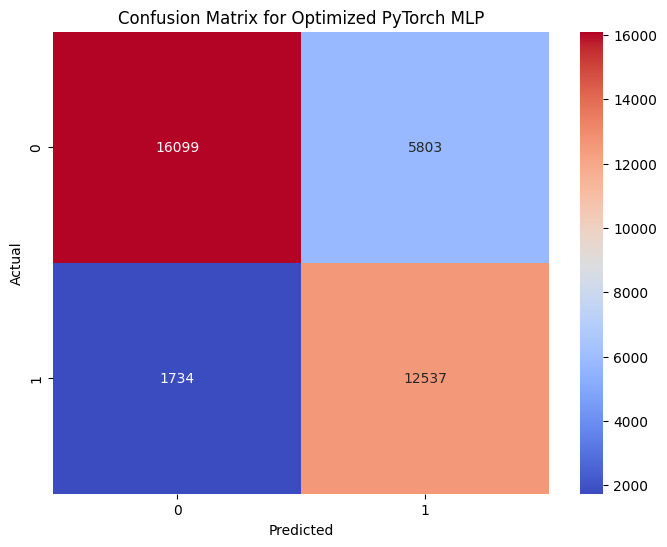

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Optimized PyTorch MLP')
plt.show()

From the generated confusion matrix, the following can be observed:
* ~**16,059** unemployed individuals were correctly classified as unemployed.
* ~**5,843** unemployed individuals were miscalssified as employed.
* ~**1,672** employed individuals were misclassified as unemployed.
* ~**12,599** employed individuals were correctly classified

This indicates that the model still misclassifies some emplyoed individuals as unemployed (and vice versa), but it has shown improvement compared to the initial model.

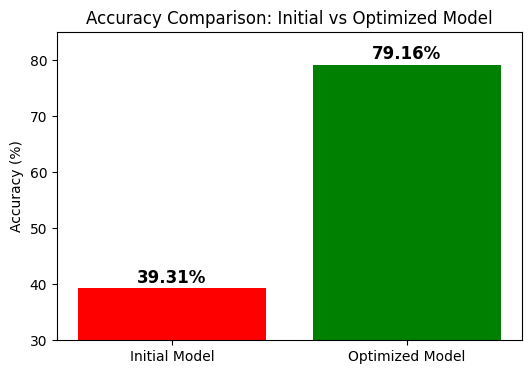

In [ ]:
models = ['Initial Model', 'Optimized Model']
accuracy = [39.31, 79.16]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracy, color=['red', 'green'])

for i, v in enumerate(accuracy):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.ylim(30, 85)
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison: Initial vs Optimized Model")

# show plot
plt.show()

## **10. Insights and Conclusions**

In this classification task, three different machine learning models were implemented: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Neural Network (NN). Upon evaluation, KNN almost completely outperformed both the Nueral Network and SVM, while the SVM performed worse than the other two. This ranking can be attributed to various factors related to model characteristics, hyperparameter tuning, and dataset features.

1. **KNN** *(~79.31% accuracy)*

K-Nearest Neighbors (KNN) achieved the highest accuracy among the three models, with a performance of approximately 79.31%. This result can be attributed to its simplicity, non-parametric nature, and ability to adapt well to the structure of the data without making strong assumptions. KNN is particularly effective when the dataset is well-distributed and features are scaled properly, as distance-based metrics drive its predictions. Compared to SVM and Neural Networks, KNN requires minimal training time, making it more computationally efficient in that phase. However, KNN can become expensive during inference and may struggle with very large datasets or high-dimensional spaces.


2. **NN** *(~79.16% accuracy)*

The Neural Network outperformed SVM, and is almost as efficient with KNN. While deep learning models are powerful, they require extensive hyperparameter tuning, sufficient training data, and an optimize learning rate to perform at their best. In this case, the NN likely benefited from its nature in which it is able to capture non-linear relationships in the data. This makes it more effective than SVM. However, issues such as overfitting, gradient descent fluctuations, and weight initialization may have prevented it from outright outperforming the other two models. Additionally, neural networks require more computational power and time for training, making them more exhausting than other models.

***It is also worth noting that, due to the stochastic nature of training, the produced evaluations and accuracies may fluctuate.***

3. **SVM** *(~78.74% accuracy)*

**Initial Model Training**

Key Observations (`Linear SVM`):
* High recall for Employed (96%) but low recall for Not Employed (54%), meaning it misclassifies many Not Employed individuals as Employed.
* The decision boundary is too simple (linear), which struggles to capture the complex relationships in employment data.
* Thus, we can infer that the Linear SVM is **underfitting**.

Key Observations (`RBF SVM`):
* More balanced recall (69% for Not Employed, 93% for Employed).
* The model is more flexible and captures complex patterns better.
* False positives and false negatives are lower compared to Linear SVM, meaning it generalizes better.
* Thus, we can infer that RBF SVM is not overfitting, but **well-fitted**.


When it comes to intial model training, RBF SVM is better at correctly identifying Not Employed individuals (69% recall vs. 54%). On the otherhand, Linear SVM is biased towards predicting "Employed," leading to many false positives (FP = 9,962). RBF provides a more balanced classification, resulting in higher overall accuracy (78.35% vs. 70.77%).

**Conclusion**

As such, KNN, barely outperformed NN, and outperformed SVM,  due to its ability to classify based on local similarity, making it an effective option for the LFS dataset. The NN, while more powerful in theory, required extensive tuning and still faced training challenges that may have limited its performance. SVM, on the other hand, struggled with the dataset's complexity and scalability issues, leading to it exhibiting the lowest performacne amongst the three. These findings highlight the importance of model selection based on dataset characteristics. Future improvements, such as better feature selection, hyperparameter optimization, and data preprocessing, could further improve these results and produce better model performance.

## **11. References**

Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The elements of statistical learning: Data mining, inference, and prediction* (2nd ed.). Springer. https://doi.org/10.1007/978-0-387-84858-7

Scikit Documentation https://scikit-learn.org/ - Used for learning about configurations for models